### Imports

In [1]:
# Ajouter chemin système pour naviguer d'un dossier à l'autre facilement
import sys
from pathlib import Path
sys.path.append(str(Path('.').absolute().parent))

In [2]:
# Check version de python
#!python3 --version

In [3]:
# check compatibilité entre les versions de tensorflow et de keras:
# https://keras.io/getting_started/#tensorflow-compatibility

#To use Keras 3:

#tensorflow~=2.15.0 & keras~=3.0.0
#tensorflow~=2.16.1 & keras~=3.0.0

# PyTorch compatibility

# torch~=2.1.0 & keras~=3.0.0

# -> supprimer versions de tensorflow et keras depuis terminal (pip uninstall tensorflow, pip uninstall keras) puis refaire les installs

In [4]:
########## Imports ##########

# General Imports
import numpy as np
import pandas as pd
import os
from packages import fonctions
from pprint import pprint
import logging

# Représentations graphiques
import matplotlib.pyplot as plt
import seaborn as sns

# Time
from datetime import datetime
from time import time
import time

# Import the tokenizer of NLTK
# à télécharger une fois :
#nltk.download('punkt')
#nltk.download('stopwords')
#nltk.download('wordnet')
#nltk.download('averaged_perceptron_tagger')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.tokenize import word_tokenize, sent_tokenize

# Sklearn
from sklearn import manifold, decomposition
from sklearn import cluster, metrics
from sklearn.decomposition import PCA, NMF, LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.manifold import TSNE
from sklearn.metrics import pairwise, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.class_weight import compute_class_weight

# pip install fasttext
from collections import defaultdict
import multiprocessing

# LDA
#!pip install pyLDAvis==3.4.1
import pyLDAvis
from pyLDAvis import gensim
import gensim
import gensim.downloader as api
from gensim.corpora import Dictionary
from gensim.matutils import Sparse2Corpus
from gensim.models import Word2Vec, TfidfModel, LsiModel, LdaModel
from gensim.models.phrases import Phrases, Phraser

# Tensorflow & keras
!pip install tensorflow==2.16.1
#!pip install tensorflow_hub
#!pip install keras==3.0.0
#!pip install torch~=2.1.0
#!pip install Keras-Preprocessing
#!pip install transformers
!pip install protobuf==3.20.0
!pip install --upgrade tensorflow-hub

import tensorflow as tf
import tensorflow_hub as hub

import keras
from keras import layers
from keras import backend as K
from keras import metrics as kmetrics
from keras.optimizers import Adam
from keras.layers import *
from keras.layers import Dense, Input
from keras.callbacks import ModelCheckpoint
from keras.models import Model
from keras_preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences

import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

# Transformers
import transformers
from transformers import AutoModel, BertTokenizerFast
from transformers import BertTokenizer
#from transformers import TFBertModel # -> problème avec install de tf bert model
from transformers import AdamW
from transformers import AutoTokenizer, TFAutoModel

from absl import logging

from tqdm.notebook import tqdm
from tokenizers import BertWordPieceTokenizer

/opt/homebrew/lib/python3.11/site-packages/google/rpc/__init__.py:20: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google.rpc')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  pkg_resources.declare_namespace(__name__)
/opt/homebrew/lib/python3.11/site-packages/pkg_resources/__init__.py:2349: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  declare_namespace(parent)



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python3.11 -m pip install --upgrade pip
  Using cached protobuf-3.20.0-py2.py3-none-any.whl.metadata (720 bytes)
Using cached protobuf-3.20.0-py2.py3-none-any.whl (162 kB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.25.3
    Uninstalling protobuf-4.25.3:
      Successfully uninstalled protobuf-4.25.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-cloud-bigquery-storage 2.19.1 requires protobuf!=3.20.0,!=3.20.1,!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.19.5, but you have protobuf 3.20.0 which is incompatible.
google-cloud-bigquery 3.10.0 requires protobuf!=3.20.0,!=3.20.1,!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.19.5, but you have protobuf 3.20.0 which is incompatible.
grpcio-status 1.5

In [5]:
########## Apparence ##########

# Warnings
import warnings
warnings.simplefilter(action = 'ignore')

# Set display preferences
pd.set_option('display.max_row', 250)
pd.set_option('display.max_column', 100)

# Choix d'une palette de couleurs
sns.set_palette('Set2', color_codes = True)
print(sns.color_palette('Set2').as_hex())
sns.set_style('darkgrid')
sns.color_palette()

['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854', '#ffd92f', '#e5c494', '#b3b3b3']


[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]

In [6]:
########## Import données csv ##########
# dossier data hors du dossier code pour ne pas l'importer dans github

df = pd.read_csv('../../data/df_clean.csv')
df.shape

(924, 18)

In [7]:
df

uniq_id crawl_timestamp  \
0    55b85ea15a1536d46b7190ad6fff8ce7      2016-04-30   
1    7b72c92c2f6c40268628ec5f14c6d590      2016-04-30   
2    d4684dcdc759dd9cdf41504698d737d8      2016-06-20   
3    6325b6870c54cd47be6ebfbffa620ec7      2016-06-20   
4    f355cc1ccb08bd0d283ed979b7ee7515      2015-12-04   
..                                ...             ...   
919  38782cce965307ddcdbedfcb7fa409c3      2015-12-01   
920  be0f39341d771aac57084970f1ed6425      2015-12-01   
921  958f54f4c46b53c8a0a9b8167d9140bc      2015-12-01   
922  c3edc504d1b4f0ba6224fa53a43a7ad6      2015-12-01   
923  f2f027ad6a6df617c9f125173da71e44      2015-12-01   

                                           product_url  \
0    http://www.flipkart.com/elegance-polyester-mul...   
1    http://www.flipkart.com/sathiyas-cotton-bath-t...   
2    http://www.flipkart.com/santosh-royal-fashion-...   
3    http://www.flipkart.com/jaipur-print-cotton-fl...   
4    http://www.flipkart.com/camerii-wm64-elegance-...   
..                                                 ...   
919  http://www.flipkart.com/999store-medium-paper-...   
920  http://www.flipkart.com/wallmantra-medium-viny...   
921  http://www.flipkart.com/oren-empower-extra-lar...   
922  http://www.flipkart.com/wallmantra-medium-viny...   
923  http://www.flipkart.com/uberlyfe-large-vinyl-s...   

                                          product_name  \
0    Elegance Polyester Multicolor Abstract Eyelet ...   
1                           Sathiyas Cotton Bath Towel   
2    SANTOSH ROYAL FASHION Cotton Printed King size...   
3    Jaipur Print Cotton Floral King sized Double B...   
4    Camerii WM64 Elegance Analog Watch  - For Men,...   
..                                                 ...   
919                      999store Medium Paper Sticker   
920           Wallmantra Medium Vinyl Stickers Sticker   
921     Oren Empower Extra Large Self Adhesive Sticker   
922            Wallmantra Medium Vinyl Sticker Sticker   
923                       Uberlyfe Large Vinyl Sticker   

                                 product_category_tree               pid  \
0    ["Home Furnishing >> Curtains & Accessories >>...  CRNEG7BKMFFYHQ8Z   
1    ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEGFZHGBXPHZUH   
2    ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJT9UQWHDUBH4   
3    ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJTHNGWVGWWQU   
4    ["Watches >> Wrist Watches >> Camerii Wrist Wa...  WATE6Y6D2MZHWGBZ   
..                                                 ...               ...   
919  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIE2FRBYYC92E2C   
920  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIE9F5UYBHF4MXU   
921  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIE88ZGTX65GH4V   
922  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIEC889ZGFD3RCE   
923  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIE2ZEPACRQJKH7   

     retail_price  discounted_price                                 image  \
0          1899.0             899.0  55b85ea15a1536d46b7190ad6fff8ce7.jpg   
1           600.0             449.0  7b72c92c2f6c40268628ec5f14c6d590.jpg   
2          2699.0            1299.0  d4684dcdc759dd9cdf41504698d737d8.jpg   
3          2599.0             698.0  6325b6870c54cd47be6ebfbffa620ec7.jpg   
4          1099.0             449.0  f355cc1ccb08bd0d283ed979b7ee7515.jpg   
..            ...               ...                                   ...   
919         999.0             599.0  38782cce965307ddcdbedfcb7fa409c3.jpg   
920        1429.0            1143.0  be0f39341d771aac57084970f1ed6425.jpg   
921        1399.0             999.0  958f54f4c46b53c8a0a9b8167d9140bc.jpg   
922        3465.0            1333.0  c3edc504d1b4f0ba6224fa53a43a7ad6.jpg   
923        1190.0             595.0  f2f027ad6a6df617c9f125173da71e44.jpg   

     is_FK_Advantage_product  \
0                      False   
1                      False   
2                

In [8]:
df.columns

Index(['uniq_id', 'crawl_timestamp', 'product_url', 'product_name',
       'product_category_tree', 'pid', 'retail_price', 'discounted_price',
       'image', 'is_FK_Advantage_product', 'description', 'product_rating',
       'overall_rating', 'product_specifications', 'category', 'category_4',
       'sous_category', 'sous_ensemble'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924 entries, 0 to 923
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  924 non-null    object 
 1   crawl_timestamp          924 non-null    object 
 2   product_url              924 non-null    object 
 3   product_name             924 non-null    object 
 4   product_category_tree    924 non-null    object 
 5   pid                      924 non-null    object 
 6   retail_price             924 non-null    float64
 7   discounted_price         924 non-null    float64
 8   image                    924 non-null    object 
 9   is_FK_Advantage_product  924 non-null    bool   
 10  description              924 non-null    object 
 11  product_rating           924 non-null    object 
 12  overall_rating           924 non-null    object 
 13  product_specifications   924 non-null    object 
 14  category                 8

In [10]:
########## Analyse du texte ##########

# librairies
# -> NLTK
# -> Spacy

# Regex cheatsheet -> https://www.debuggex.com/cheatsheet/regex/python

# recap cours
# token, retirer stopwords, stemming/lemmatization (supprimer suffixes et préfixes)

In [11]:
# Catégories
df['category_4'].value_counts()

category_4
Baby and Personal Care          277
Electronics and Accessories     248
Home and Kitchen Essential      245
Festive and Special Occasion    120
Name: count, dtype: int64

In [12]:
# ne garder que les deux colonnes qui nous intéressent : catégorie et description

df = df[['category_4', 'description']]
df.columns = ['category', 'description']
df.shape

(924, 2)

In [13]:
df.sample(6)

category                                        description
312  Baby and Personal Care  Flipkart.com: Buy Beverly Hills Polo Club BLUE...
383                     NaN  Flipkart.com: Buy Milton School 750 ml Water B...
869  Baby and Personal Care  Key Features of CoffeeBean Regular Fit Baby Gi...
50   Baby and Personal Care  Key Features of RYTHMX FB NAIL POLISHES BLACK ...
639  Baby and Personal Care  Key Features of AntiqueShop ABKL_GRN_GRN_GRN S...
276  Baby and Personal Care  Flipkart.com: Buy Archies VJ-552 Combo Set onl...

#### Text pre processing

In [14]:
########## TEXT PROCESSING ##########

# utiliser la description des produits car texte le plus long
# explication à développer un peu

In [15]:
def nlp_preprocessing(df, colonne, langue):

    """
    Fonction pour faire le preprocessing de la colonne d'un df
    - tokenizer
    - enlever ponctuation
    - mettre en minuscule
    - enlever stop words
    - stem
    - lemmatize

    df -> nom du dataframe sur lequel on travaille
    colonne -> nom de la colonne qu'on veut transformer (str)
    langue -> nom anglais de la langue correspondante ('french', 'spanish', 'english'...) (str)

    return -> df avec une colonne 'tokens' en plus correspondant au texte preprocessé

    """
    # tokenizer
    df['tokens'] = df[colonne].apply(word_tokenize)

    # enlever ponctuation
    df['tokens'] = df['tokens'].apply(lambda x: [item for item in x if item.isalpha()])

    # mettre en minuscule
    df['tokens'] = df['tokens'].apply(lambda x : [item.lower() for item in x])

    # enlever stop words
    stop = stopwords.words(langue)
    df['tokens'] = df['tokens'].apply(lambda x: [item for item in x if item not in stop])

    # Stem
    stemmer = PorterStemmer()
    df['stemmed'] = df['tokens'].apply(lambda x: [stemmer.stem(item) for item in x])

    # Lemmatize
    lemmatizer = WordNetLemmatizer()
    df['lemmatized'] = df['stemmed'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])

    # Remove list format
    df['clean_text'] = df['lemmatized'].apply(lambda x: ' '.join(x))

    return df

In [16]:
nlp_preprocessing(df, 'description', 'english')

category  \
0     Home and Kitchen Essential   
1         Baby and Personal Care   
2     Home and Kitchen Essential   
3     Home and Kitchen Essential   
4    Electronics and Accessories   
..                           ...   
919       Baby and Personal Care   
920       Baby and Personal Care   
921       Baby and Personal Care   
922       Baby and Personal Care   
923       Baby and Personal Care   

                                           description  \
0    Key Features of Elegance Polyester Multicolor ...   
1    Specifications of Sathiyas Cotton Bath Towel (...   
2    Key Features of SANTOSH ROYAL FASHION Cotton P...   
3    Key Features of Jaipur Print Cotton Floral Kin...   
4    Camerii WM64 Elegance Analog Watch  - For Men,...   
..                                                 ...   
919  Buy 999store Medium Paper Sticker for Rs.599 o...   
920  Buy Wallmantra Medium Vinyl Stickers Sticker f...   
921  Oren Empower Extra Large Self Adhesive Sticker...   
922  Buy Wallmantra Medium Vinyl Sticker Sticker fo...   
923  Buy Uberlyfe Large Vinyl Sticker for Rs.595 on...   

                                                tokens  \
0    [key, features, elegance, polyester, multicolo...   
1    [specifications, sathiyas, cotton, bath, towel...   
2    [key, features, santosh, royal, fashion, cotto...   
3    [key, features, jaipur, print, cotton, floral,...   
4    [camerii, elegance, analog, watch, men, boys, ...   
..                                                 ...   
919  [buy, medium, paper, sticker, online, medium, ...   
920  [buy, wallmantra, medium, vinyl, stickers, sti...   
921  [oren, empower, extra, large, self, adhesive, ...   
922  [buy, wallmantra, medium, vinyl, sticker, stic...   
923  [buy, uberlyfe, large, vinyl, sticker, online,...   

                                               stemmed  \
0    [key, featur, eleg, polyest, multicolor, abstr...   
1    [specif, sathiya, cotton, bath, towel, bath, t...   
2    [key, featur, santosh, royal, fashion, cotton,...   
3    [key, featur, jaipur, print, cotton, floral, k...   
4    [camerii, eleg, analog, watch, men, boy, buy, ...   
..                                                 ...   
919  [buy, medium, paper, sticker, onlin, medium, p...   
920  [buy, wallmantra, medium, vinyl, sticker, stic...   
921  [oren, empow, extra, larg, self, adhes, sticke...   
922  [buy, wallmantra, medium, vinyl, sticker, stic...   
923  [buy, uberlyf, larg, vinyl, sticker, onlin, ub...   

                                            lemmatized  \
0    [key, featur, eleg, polyest, multicolor, abstr...   
1    [specif, sathiya, cotton, bath, towel, bath, t...   
2    [key, featur, santosh, royal, fashion, cotton,...   
3    [key, featur, jaipur, print, cotton, floral, k...   
4    [camerii, eleg, analog, watch, men, boy, buy, ...   
..                                                 ...   
919  [buy, medium, paper, sticker, onlin, medium, p...   
920  [buy, wallmantra, medium, vinyl, sticker, stic...   
921  [oren, empow, extra, larg, self, adhes, sticke...   
922  [buy, wallmantra, medium, vinyl, sticker, stic...   
923  [buy, uberlyf, larg, vinyl, sticker, onlin, ub...   

                                            clean_text  
0    key featur eleg polyest multicolor abstract ey...  
1    specif sathiya cotton bath towel bath towel re...  
2    key featur santosh royal fashion cotton print ...  
3    key featur jaipur print cotton floral king siz...  
4    camerii eleg analog watch men boy buy camerii ...  
..                                                 ...  
919  buy medium paper sticker onlin medium paper st...  
920  buy wallmantra medium vinyl sticker sticker on...  
921  oren empow extra larg self adhes sticker pack ...  
922  buy wallmantra medium vinyl sticker sticker on...  
923  buy uberlyf larg vinyl sticker onlin uberlyf l...  

[924 rows x 6 columns]

In [17]:
# regarder fonctions de cleaning proposées en exemple
# -> fonctions séparées (une fonction par action)

# Tokenizer
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize

def tokenizer_fct(sentence) :
    # print(sentence)
    sentence_clean = sentence.replace('-', ' ').replace('+', ' ').replace('/', ' ').replace('#', ' ')
    word_tokens = word_tokenize(sentence_clean)
    return word_tokens

# Stop words
from nltk.corpus import stopwords
stop_w = list(set(stopwords.words('english'))) + ['[', ']', ',', '.', ':', '?', '(', ')']

def stop_word_filter_fct(list_words) :
    filtered_w = [w for w in list_words if not w in stop_w]
    filtered_w2 = [w for w in filtered_w if len(w) > 2]
    return filtered_w2

# lower case et alpha
def lower_start_fct(list_words) :
    lw = [w.lower() for w in list_words if (not w.startswith("@")) 
    #                                   and (not w.startswith("#"))
                                       and (not w.startswith("http"))]
    return lw

# Lemmatizer (base d'un mot)
from nltk.stem import WordNetLemmatizer

def lemma_fct(list_words) :
    lemmatizer = WordNetLemmatizer()
    lem_w = [lemmatizer.lemmatize(w) for w in list_words]
    return lem_w

# Fonction de préparation du texte pour le bag of words (Countvectorizer et Tf_idf, Word2Vec)
def transform_bow_fct(desc_text) :
    word_tokens = tokenizer_fct(desc_text)
    sw = stop_word_filter_fct(word_tokens)
    lw = lower_start_fct(sw)
    # lem_w = lemma_fct(lw)    
    transf_desc_text = ' '.join(lw)
    return transf_desc_text

# Fonction de préparation du texte pour le bag of words avec lemmatization
def transform_bow_lem_fct(desc_text) :
    word_tokens = tokenizer_fct(desc_text)
    sw = stop_word_filter_fct(word_tokens)
    lw = lower_start_fct(sw)
    lem_w = lemma_fct(lw)    
    transf_desc_text = ' '.join(lem_w)
    return transf_desc_text

# Fonction de préparation du texte pour le Deep learning (USE et BERT)
def transform_dl_fct(desc_text) :
    word_tokens = tokenizer_fct(desc_text)
#    sw = stop_word_filter_fct(word_tokens)
    lw = lower_start_fct(word_tokens)
    # lem_w = lemma_fct(lw)    
    transf_desc_text = ' '.join(lw)
    return transf_desc_text


df_2 = df.copy()
df_2['sentence_bow'] = df_2['description'].apply(lambda x : transform_bow_fct(x))
df_2['sentence_bow_lem'] = df_2['description'].apply(lambda x : transform_bow_lem_fct(x))
df_2['sentence_dl'] = df_2['description'].apply(lambda x : transform_dl_fct(x))
df_2.shape


(924, 9)

In [18]:
df_2

category  \
0     Home and Kitchen Essential   
1         Baby and Personal Care   
2     Home and Kitchen Essential   
3     Home and Kitchen Essential   
4    Electronics and Accessories   
..                           ...   
919       Baby and Personal Care   
920       Baby and Personal Care   
921       Baby and Personal Care   
922       Baby and Personal Care   
923       Baby and Personal Care   

                                           description  \
0    Key Features of Elegance Polyester Multicolor ...   
1    Specifications of Sathiyas Cotton Bath Towel (...   
2    Key Features of SANTOSH ROYAL FASHION Cotton P...   
3    Key Features of Jaipur Print Cotton Floral Kin...   
4    Camerii WM64 Elegance Analog Watch  - For Men,...   
..                                                 ...   
919  Buy 999store Medium Paper Sticker for Rs.599 o...   
920  Buy Wallmantra Medium Vinyl Stickers Sticker f...   
921  Oren Empower Extra Large Self Adhesive Sticker...   
922  Buy Wallmantra Medium Vinyl Sticker Sticker fo...   
923  Buy Uberlyfe Large Vinyl Sticker for Rs.595 on...   

                                                tokens  \
0    [key, features, elegance, polyester, multicolo...   
1    [specifications, sathiyas, cotton, bath, towel...   
2    [key, features, santosh, royal, fashion, cotto...   
3    [key, features, jaipur, print, cotton, floral,...   
4    [camerii, elegance, analog, watch, men, boys, ...   
..                                                 ...   
919  [buy, medium, paper, sticker, online, medium, ...   
920  [buy, wallmantra, medium, vinyl, stickers, sti...   
921  [oren, empower, extra, large, self, adhesive, ...   
922  [buy, wallmantra, medium, vinyl, sticker, stic...   
923  [buy, uberlyfe, large, vinyl, sticker, online,...   

                                               stemmed  \
0    [key, featur, eleg, polyest, multicolor, abstr...   
1    [specif, sathiya, cotton, bath, towel, bath, t...   
2    [key, featur, santosh, royal, fashion, cotton,...   
3    [key, featur, jaipur, print, cotton, floral, k...   
4    [camerii, eleg, analog, watch, men, boy, buy, ...   
..                                                 ...   
919  [buy, medium, paper, sticker, onlin, medium, p...   
920  [buy, wallmantra, medium, vinyl, sticker, stic...   
921  [oren, empow, extra, larg, self, adhes, sticke...   
922  [buy, wallmantra, medium, vinyl, sticker, stic...   
923  [buy, uberlyf, larg, vinyl, sticker, onlin, ub...   

                                            lemmatized  \
0    [key, featur, eleg, polyest, multicolor, abstr...   
1    [specif, sathiya, cotton, bath, towel, bath, t...   
2    [key, featur, santosh, royal, fashion, cotton,...   
3    [key, featur, jaipur, print, cotton, floral, k...   
4    [camerii, eleg, analog, watch, men, boy, buy, ...   
..                                                 ...   
919  [buy, medium, paper, sticker, onlin, medium, p...   
920  [buy, wallmantra, medium, vinyl, sticker, stic...   
921  [oren, empow, extra, larg, self, adhes, sticke...   
922  [buy, wallmantra, medium, vinyl, sticker, stic...   
923  [buy, uberlyf, larg, vinyl, sticker, onlin, ub...   

                                            clean_text  \
0    key featur eleg polyest multicolor abstract ey...   
1    specif sathiya cotton bath towel bath towel re...   
2    key featur santosh royal fashion cotton print ...   
3    key featur jaipur print cotton floral king siz...   
4    camerii eleg analog watch men boy buy camerii ...   
..                                                 ...   
919  buy medium paper sticker onlin medium paper st...   
920  buy wallmantra medium vinyl sticker sticker on...   
921  oren empow extra larg self adhes sticker pack ...   
922  buy wallmantra medium vinyl sticker sticker on...   
923  buy uberlyf larg vinyl sticker onlin uberlyf l...   

                                          sentence_bow  \
0    key features elegance polyester multicolor 

In [19]:
# Encoding de la target
le = LabelEncoder()
le.fit(df['category'])

df['target_encoded'] = le.transform(df['category'])
df.head()

category  \
0   Home and Kitchen Essential   
1       Baby and Personal Care   
2   Home and Kitchen Essential   
3   Home and Kitchen Essential   
4  Electronics and Accessories   

                                         description  \
0  Key Features of Elegance Polyester Multicolor ...   
1  Specifications of Sathiyas Cotton Bath Towel (...   
2  Key Features of SANTOSH ROYAL FASHION Cotton P...   
3  Key Features of Jaipur Print Cotton Floral Kin...   
4  Camerii WM64 Elegance Analog Watch  - For Men,...   

                                              tokens  \
0  [key, features, elegance, polyester, multicolo...   
1  [specifications, sathiyas, cotton, bath, towel...   
2  [key, features, santosh, royal, fashion, cotto...   
3  [key, features, jaipur, print, cotton, floral,...   
4  [camerii, elegance, analog, watch, men, boys, ...   

                                             stemmed  \
0  [key, featur, eleg, polyest, multicolor, abstr...   
1  [specif, sathiya, cotton, bath, towel, bath, t...   
2  [key, featur, santosh, royal, fashion, cotton,...   
3  [key, featur, jaipur, print, cotton, floral, k...   
4  [camerii, eleg, analog, watch, men, boy, buy, ...   

                                          lemmatized  \
0  [key, featur, eleg, polyest, multicolor, abstr...   
1  [specif, sathiya, cotton, bath, towel, bath, t...   
2  [key, featur, santosh, royal, fashion, cotton,...   
3  [key, featur, jaipur, print, cotton, floral, k...   
4  [camerii, eleg, analog, watch, men, boy, buy, ...   

                                          clean_text  target_encoded  
0  key featur eleg polyest multicolor abstract ey...               3  
1  specif sathiya cotton bath towel bath towel re...               0  
2  key featur santosh royal fashion cotton print ...               3  
3  key featur jaipur print cotton floral king siz...               3  
4  camerii eleg analog watch men boy buy camerii ...               1

### Réduction de dimensions

In [20]:
# Maintenant que les features sont extraites -> réduction en 2 dimensions

In [21]:
df_pca = df[['target_encoded', 'clean_text']]

In [22]:
l_cat = list(set(df['category']))
print("catégories : ", l_cat)

catégories :  ['Electronics and Accessories', 'Baby and Personal Care', 'Home and Kitchen Essential', 'Festive and Special Occasion', nan]


In [23]:
y_cat_num = [(1-l_cat.index(df.iloc[i]['category'])) for i in range(len(df))]
y_cat_num

[-1,
 0,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 -2,
 -1,
 -2,
 -1,
 0,
 -1,
 0,
 0,
 -1,
 -1,
 -1,
 1,
 -1,
 0,
 -1,
 1,
 -3,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 -1,
 -1,
 0,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 0,
 0,
 0,
 0,
 0,
 -1,
 0,
 -2,
 -2,
 0,
 0,
 -2,
 -2,
 -3,
 -1,
 -2,
 -2,
 -2,
 -2,
 0,
 0,
 0,
 -2,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 0,
 -2,
 0,
 -1,
 0,
 1,
 -1,
 0,
 1,
 -2,
 0,
 0,
 0,
 -2,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -2,
 -2,
 -1,
 -2,
 -1,
 -2,
 0,
 -2,
 -1,
 -2,
 -2,
 -2,
 -2,
 -2,
 -2,
 -2,
 -1,
 -1,
 -1,
 0,
 -2,
 -1,
 -2,
 -2,
 -2,
 -2,
 -2,
 -2,
 -2,
 -3,
 -1,
 -2,
 -3,
 -2,
 -3,
 -3,
 -3,
 -3,
 -3,
 -3,
 -

In [24]:
# Calcul Tsne, détermination des clusters et calcul ARI entre vrais catégories et n° de clusters
# (fonctions de l'exemple du cours)

def ARI_fct(features):
    time1 = time.time()
    num_labels = len(l_cat)
    tsne = manifold.TSNE(n_components = 2, perplexity = 30, n_iter = 2000, init = 'random', learning_rate = 200, random_state = 42)
    X_tsne = tsne.fit_transform(features)

    # Détermination des clusters à partir des données après Tsne
    cls = cluster.KMeans(n_clusters = num_labels, n_init = 100, random_state = 42)
    cls.fit(X_tsne)
    ARI = np.round(metrics.adjusted_rand_score(y_cat_num, cls.labels_), 4)
    time2 = np.round(time.time() - time1,0)
    print('ARI : ', ARI, 'time : ', time2)

    return ARI, X_tsne, cls.labels_

# visualisation du Tsne selon les vraies catégories et selon les clusters
def TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI):
    fig = plt.figure(figsize = (15, 6))

    ax = fig.add_subplot(121)
    scatter = ax.scatter(X_tsne[:, 0], X_tsne[:, 1], c = y_cat_num, cmap = 'Set1')
    ax.legend(handles = scatter.legend_elements()[0], labels = l_cat, loc = 'best', title = 'Categorie')
    plt.title('Représentation des produits par catégories réelles')

    ax = fig.add_subplot(122)
    scatter = ax.scatter(X_tsne[:, 0], X_tsne[:, 1], c = labels, cmap = 'Set1')
    ax.legend(handles = scatter.legend_elements()[0], labels = set(labels), loc = 'best', title = 'Clusters')
    plt.title('Représentation des produits par clusters')

    plt.show()
    print('ARI : ', ARI)

#### Bag of Words (BOW)

In [25]:
# création du bag of words (CountVectorizer et Tf-idf)

cvect = CountVectorizer(stop_words = 'english', max_df = 0.95, min_df = 1)
ctf = TfidfVectorizer(stop_words = 'english', max_df = 0.95, min_df = 1)

feat = 'clean_text'
cv_fit = cvect.fit(df[feat])
ctf_fit = ctf.fit(df[feat])

cv_transform = cvect.transform(df[feat])
ctf_transform = ctf.transform(df[feat])

In [26]:
print('CountVectorizer : ')
print('-----------------')
ARI, X_tsne, labels = ARI_fct(cv_transform)
print('\n')
print('Tf-idf : ')
print('--------')
ARI, X_tsne, labels = ARI_fct(ctf_transform)

CountVectorizer : 
-----------------
ARI :  0.2637 time :  6.0


Tf-idf : 
--------
ARI :  0.2893 time :  5.0


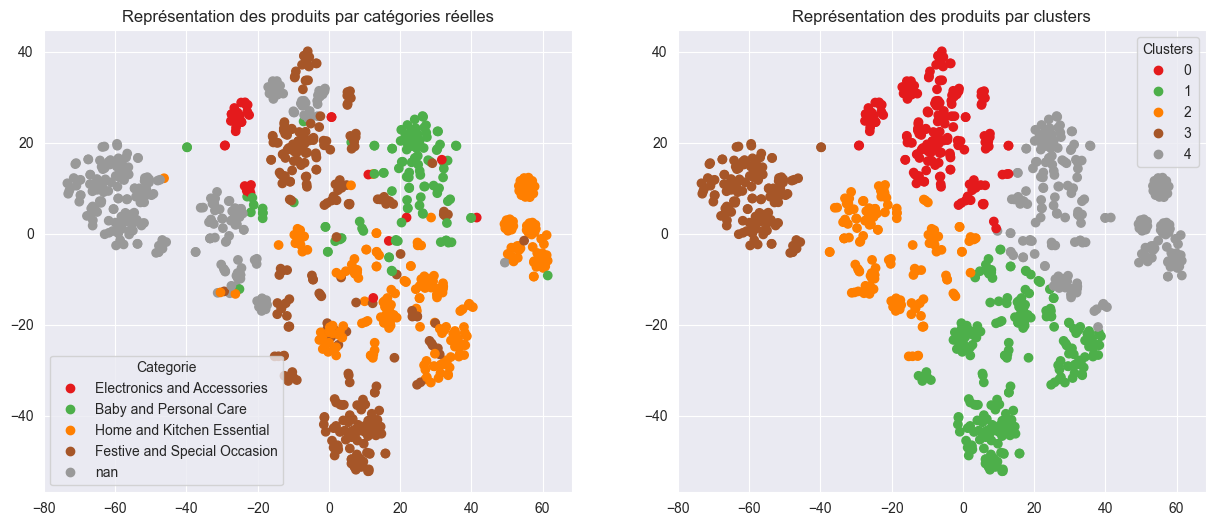

ARI :  0.2893


In [27]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

In [28]:
########### BOW ##########
# = Bag of words
# -> vecteur qui garde l'information de combien de fois un mot est rencontré dans un texte donné

# Compute the BOW
BOWvectorizer = CountVectorizer(stop_words = 'english')
BOW = BOWvectorizer.fit_transform(df['clean_text']).toarray()

In [29]:
BOWvectorizer.get_feature_names_out()

array(['aa', 'aaa', 'aapno', ..., 'zone', 'zora', 'zyxel'], dtype=object)

In [30]:
# BOWvectorizer.get_feature_names() # -> ne fonctionne pas -> AttributeError: 'CountVectorizer' object has no attribute 'get_feature_names'
# -> dépend de la version de sklearn

In [31]:
BOW = pd.DataFrame(data = BOW, columns = BOWvectorizer.get_feature_names_out())
BOW

aa  aaa  aapno  aarika  abil  abl  abod  abroad  absolut  absorb  \
0     0    0      0       0     0    0     0       0        0       0   
1     0    0      0       0     0    0     0       0        0       0   
2     0    0      0       0     0    0     0       0        0       0   
3     0    0      0       0     0    0     0       0        0       0   
4     0    0      0       0     0    0     0       0        0       0   
..   ..  ...    ...     ...   ...  ...   ...     ...      ...     ...   
919   0    0      0       0     0    0     0       0        0       0   
920   0    0      0       0     0    0     0       0        0       0   
921   0    0      0       0     0    0     0       0        0       0   
922   0    0      0       0     0    0     0       0        0       0   
923   0    0      0       0     0    0     0       0        0       0   

     abstract  abstrct  ac  accent  access  accessori  accid  accident  \
0           4        0   0       0       0          0      0         0   
1           0        0   0       0       0          0      0         0   
2           0        0   0       0       0          0      0         0   
3           0        0   0       0       0          0      0         0   
4           0        0   0       0       0          0      0         0   
..        ...      ...  ..     ...     ...        ...    ...       ...   
919         0        0   0       0       0          0      0         0   
920         0        0   0       0       0          0      0         0   
921         0        0   0       0       0          0      0         0   
922         0        0   0       0       0          0      0         0   
923         0        0   0       0       0          0      0         0   

     accomplish  accord  acer  ach  acid  acn  acryl  act  activ  actual  ad  \
0             0       0     0    0     0    0      0    0      0       0   0   
1             0       0     0    0     0    0      0    0      0       0   0   
2             0       0     0    0     0    0      0    0      0       0   0   
3             0       0     0    0     0    0      0    0      0       0   0   
4             0       0     0    0     0    0      0    0      0       0   0   
..          ...     ...   ...  ...   ...  ...    ...  ...    ...     ...  ..   
919           0       0     0    0     0    0      0    0      0       0   0   
920           0       0     0    0     0    0      0    0      0       0   0   
921           0       0     0    0     0    0      0    0      0       0   0   
922           0       0     0    0     0    0      0    0      0       0   0   
923           0       0     0    0     0    0      0    0      0       0   0   

     adaa  adapt  adaptor  add  addict  addit  adhes  adida  adino  adjust  \
0       0      0        0    0       0      0      0      0      0       0   
1       0      0        0    0       0      0      0      0      0       0   
2       0      0        0    0       0      0      0      0      0       0   
3       0      0        0    0       0      0      0      0      0       0   
4       0      0        0    0       0      0      0      0      0       0   
..    ...    ...      ...  ...     ...    ...    ...    ...    ...     ...   
919     0      0        0    0       0      0      0      0      0       0   
920     0      0        0    0       0      0      0      0      0       0   
921     0      0        0    0       0      0      1      0      0       0   
922     0      0        0    0       0      0      0      0      0       0   
923     0      0        0    0       0      0      0      0      0       0   

     admir  ador  adorn  adsl  advanc  advic  advis  aero  affect  afford  \
0        0     0      0     0       0      0      0     0       0       0   
1        0     0      0     0       0      0      0     0       0       0   
2        0     0      0     0       0      0      0     0       0       0   
3        0     0      0     0    

In [32]:
BOW.shape

(924, 3275)

In [33]:
# Nombre de mots par ligne (donc pas description)
BOW.sum(axis = 1)

0      135
1       60
2      110
3      143
4       26
      ... 
919     19
920     23
921    203
922     23
923     21
Length: 924, dtype: int64

#### TF-IDF

In [34]:
########### TF-IDF ###########
# Term Frequency (TF) = nb d'occurences d'un mot dans un texte normalisé par le nb de mots dans le texte - très proche du BOW, mais ici normalisation
# Inverse Document Frequency (IDF) = inverse de la fréquence d'un terme -> va donner un poids plus important à un mot rare qu'à un mot fréquent

# TF-IDF = TF x IDF

vectorizer = TfidfVectorizer(stop_words = 'english')
tf_idf = vectorizer.fit_transform(df['clean_text']).toarray()
tf_idf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [35]:
#df_tfidf = pd.DataFrame(data = tf_idf, columns = vectorizer.get_feature_names())
df_tfidf = pd.DataFrame(data = tf_idf, columns = vectorizer.get_feature_names_out()) # attention, encore une fois, dépend de la version de sklearn utilisée
df_tfidf

aa  aaa  aapno  aarika  abil  abl  abod  abroad  absolut  absorb  \
0    0.0  0.0    0.0     0.0   0.0  0.0   0.0     0.0      0.0     0.0   
1    0.0  0.0    0.0     0.0   0.0  0.0   0.0     0.0      0.0     0.0   
2    0.0  0.0    0.0     0.0   0.0  0.0   0.0     0.0      0.0     0.0   
3    0.0  0.0    0.0     0.0   0.0  0.0   0.0     0.0      0.0     0.0   
4    0.0  0.0    0.0     0.0   0.0  0.0   0.0     0.0      0.0     0.0   
..   ...  ...    ...     ...   ...  ...   ...     ...      ...     ...   
919  0.0  0.0    0.0     0.0   0.0  0.0   0.0     0.0      0.0     0.0   
920  0.0  0.0    0.0     0.0   0.0  0.0   0.0     0.0      0.0     0.0   
921  0.0  0.0    0.0     0.0   0.0  0.0   0.0     0.0      0.0     0.0   
922  0.0  0.0    0.0     0.0   0.0  0.0   0.0     0.0      0.0     0.0   
923  0.0  0.0    0.0     0.0   0.0  0.0   0.0     0.0      0.0     0.0   

     abstract  abstrct   ac  accent  access  accessori  accid  accident  \
0    0.179699      0.0  0.0     0.0     0.0        0.0    0.0       0.0   
1    0.000000      0.0  0.0     0.0     0.0        0.0    0.0       0.0   
2    0.000000      0.0  0.0     0.0     0.0        0.0    0.0       0.0   
3    0.000000      0.0  0.0     0.0     0.0        0.0    0.0       0.0   
4    0.000000      0.0  0.0     0.0     0.0        0.0    0.0       0.0   
..        ...      ...  ...     ...     ...        ...    ...       ...   
919  0.000000      0.0  0.0     0.0     0.0        0.0    0.0       0.0   
920  0.000000      0.0  0.0     0.0     0.0        0.0    0.0       0.0   
921  0.000000      0.0  0.0     0.0     0.0        0.0    0.0       0.0   
922  0.000000      0.0  0.0     0.0     0.0        0.0    0.0       0.0   
923  0.000000      0.0  0.0     0.0     0.0        0.0    0.0       0.0   

     accomplish  accord  acer  ach  acid  acn  acryl  act  activ  actual   ad  \
0           0.0     0.0   0.0  0.0   0.0  0.0    0.0  0.0    0.0     0.0  0.0   
1           0.0     0.0   0.0  0.0   0.0  0.0    0.0  0.0    0.0     0.0  0.0   
2           0.0     0.0   0.0  0.0   0.0  0.0    0.0  0.0    0.0     0.0  0.0   
3           0.0     0.0   0.0  0.0   0.0  0.0    0.0  0.0    0.0     0.0  0.0   
4           0.0     0.0   0.0  0.0   0.0  0.0    0.0  0.0    0.0     0.0  0.0   
..          ...     ...   ...  ...   ...  ...    ...  ...    ...     ...  ...   
919         0.0     0.0   0.0  0.0   0.0  0.0    0.0  0.0    0.0     0.0  0.0   
920         0.0     0.0   0.0  0.0   0.0  0.0    0.0  0.0    0.0     0.0  0.0   
921         0.0     0.0   0.0  0.0   0.0  0.0    0.0  0.0    0.0     0.0  0.0   
922         0.0     0.0   0.0  0.0   0.0  0.0    0.0  0.0    0.0     0.0  0.0   
923         0.0     0.0   0.0  0.0   0.0  0.0    0.0  0.0    0.0     0.0  0.0   

     adaa  adapt  adaptor  add  addict  addit     adhes  adida  adino  adjust  \
0     0.0    0.0      0.0  0.0     0.0    0.0  0.000000    0.0    0.0     0.0   
1     0.0    0.0      0.0  0.0     0.0    0.0  0.000000    0.0    0.0     0.0   
2     0.0    0.0      0.0  0.0     0.0    0.0  0.000000    0.0    0.0     0.0   
3     0.0    0.0      0.0  0.0     0.0    0.0  0.000000    0.0    0.0     0.0   
4     0.0    0.0      0.0  0.0     0.0    0.0  0.000000    0.0    0.0     0.0   
..    ...    ...      ...  ...     ...    ...       ...    ...    ...     ...   
919   0.0    0.0      0.0  0.0     0.0    0.0  0.000000    0.0    0.0     0.0   
920   0.0    0.0      0.0  0.0     0.0    0.0  0.000000    0.0    0.0     0.0   
921   0.0    0.0      0.0  0.0     0.0    0.0  0.040261    0.0    0.0     0.0   
922   0.0    0.0      0.0  0.0     0.0    0.0  0.000000    0.0    0.0     0.0   
923   0.0    0.0      0.0  0.0     0.0    0.0  0.000000    0.0    0.0     0.0   

     admir  ador  adorn  adsl  advanc  advic  advis  aero  affect  afford  \
0      0.0   0.0    0.0   0.0     0.0    0.0    0.0   0.0     0.0     0.0   
1      0.0   0.0    0.0   0.0     0.0    0.0    0.0   0.0     0.0     0.0   
2      0.0   0.0    0.0   0.0     0.0  

In [36]:
df_tfidf.shape

(924, 3275)

In [37]:
########## Similarité ##########
# similarité entre deux textes

# cosine similarity = produit scalaire entre deux vecteurs
pairwise.cosine_similarity(tf_idf)

array([[1.        , 0.04849699, 0.07199688, ..., 0.01075068, 0.00105043,
        0.00122433],
       [0.04849699, 1.        , 0.13469008, ..., 0.00447678, 0.        ,
        0.        ],
       [0.07199688, 0.13469008, 1.        , ..., 0.00916327, 0.        ,
        0.        ],
       ...,
       [0.01075068, 0.00447678, 0.00916327, ..., 1.        , 0.15649002,
        0.10910363],
       [0.00105043, 0.        , 0.        , ..., 0.15649002, 1.        ,
        0.49667493],
       [0.00122433, 0.        , 0.        , ..., 0.10910363, 0.49667493,
        1.        ]])

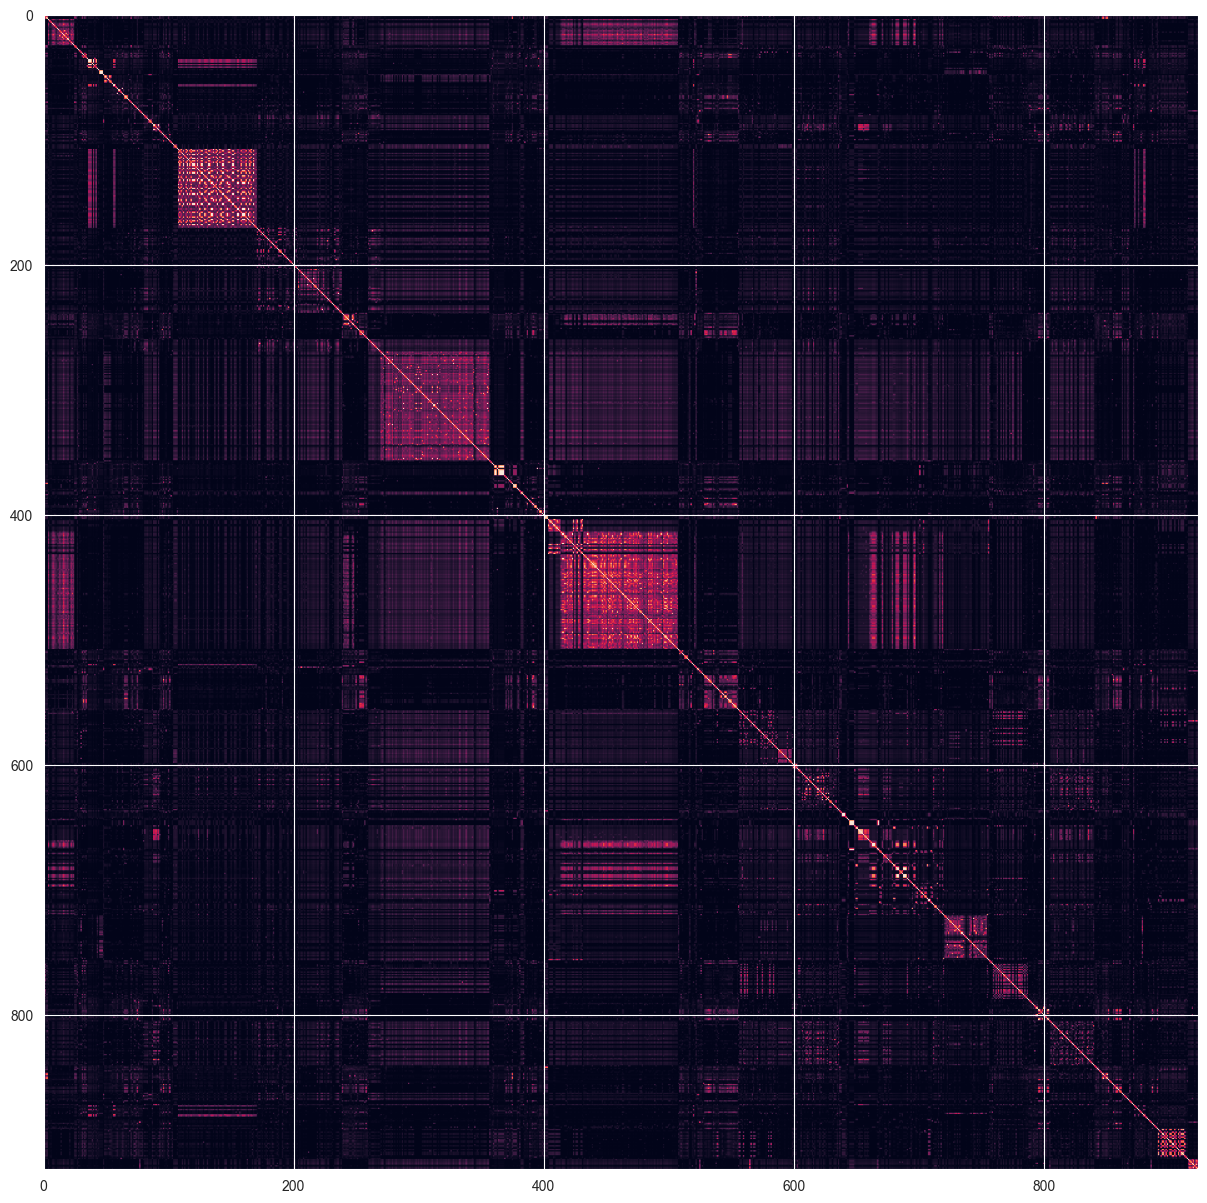

In [38]:
plt.figure(figsize = (15, 15))
plt.imshow(pairwise.cosine_similarity(tf_idf))
plt.show()

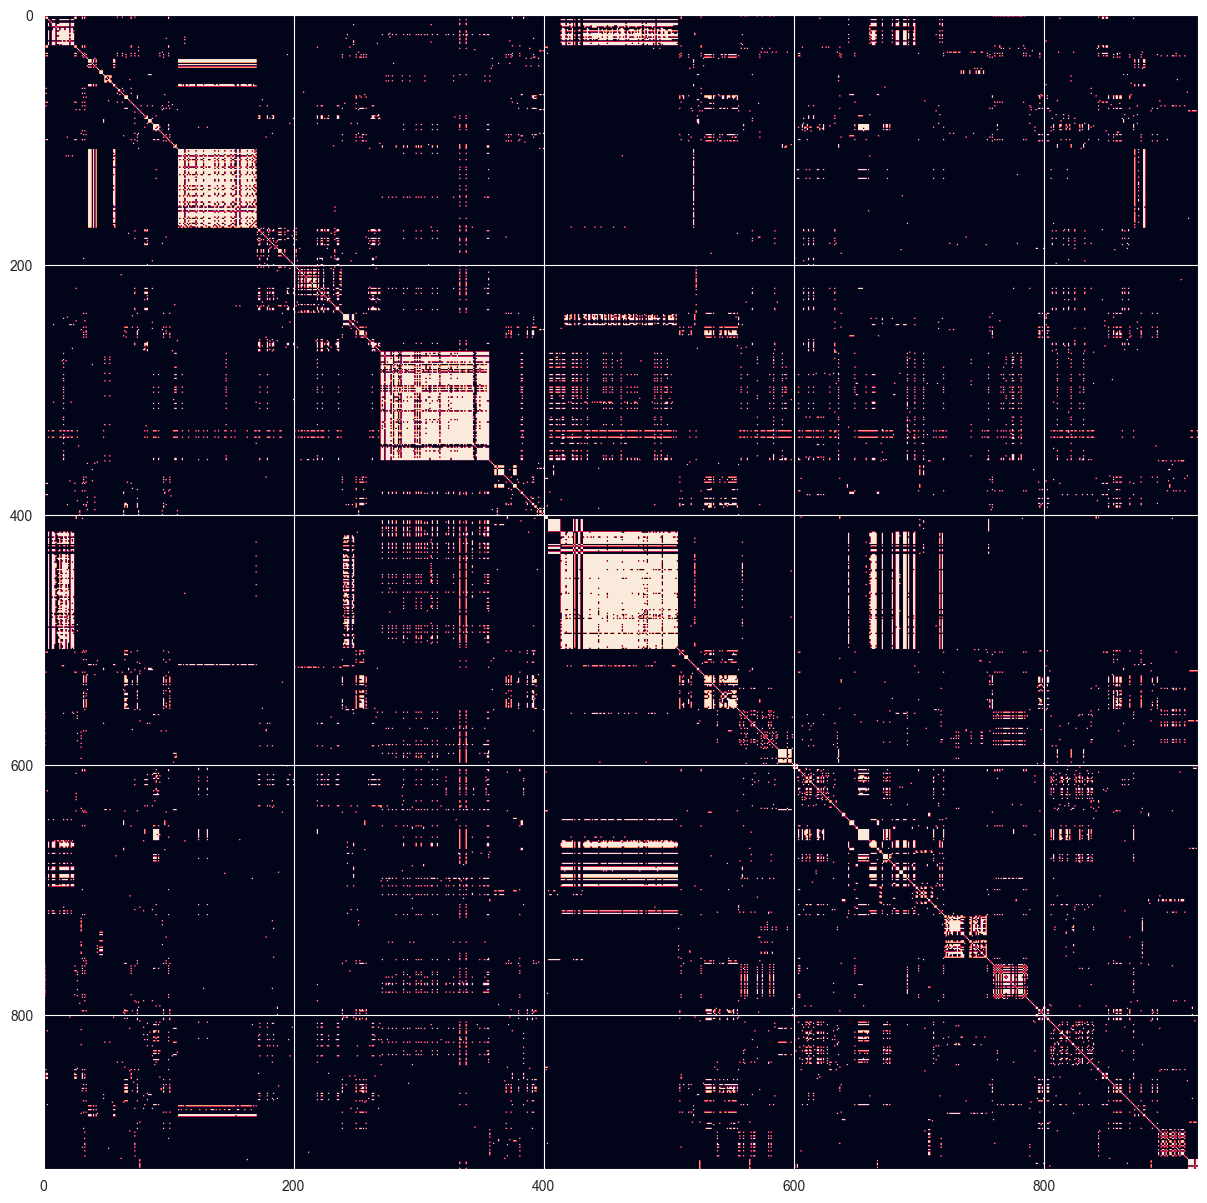

In [39]:
# définir un seuil de similarité ?

plt.figure(figsize = (15, 15))
plt.imshow(pairwise.cosine_similarity(tf_idf) > 0.2)
plt.show()


### Word embedding

In [40]:
########## Word embedding #########

# représentation matricielle, chaque mot à un nb donné de features
# idée de relation entre les mots
# but = pouvoir prédire le mot suivant dans une phrase

# GloVe, Word2Vec...

# A Word Embedding is a matrix representation, meaning each word has a given number of features. You can see the words as vectors and the features as their coordinates.
# There are many different Word Embeddings

#### GloVe

In [41]:
########## GloVe ##########
# = Global Vector
# unsupervised learning algorithm for obtaining vector representations for words

# made by Stanford NLP group -> https://nlp.stanford.edu/projects/glove/
# light word embedding, but still powerful
# several models exit, to encode words into vectors of 50, 100, 200 or even 300 dimensions


In [42]:
texts = df['clean_text']
target = df['target_encoded']

In [43]:
# Calculate the length of our vocabulary

word_tokenizer = Tokenizer()
word_tokenizer.fit_on_texts(texts)

vocab_length = len(word_tokenizer.word_index) + 1
vocab_length

3373

In [44]:
embeddings_dictionary = dict()
embedding_dim = 100

# Load GloVe 100D embeddings
with open('../../data/models/glove.6B/glove.6B.100d.txt') as fp:
    for line in fp.readlines():
        records = line.split()
        word = records[0]
        vector_dimensions = np.asarray(records[1:], dtype = 'float32')
        embeddings_dictionary [word] = vector_dimensions

# embeddings_dictionary

In [174]:
from keras.models import Sequential
from keras.layers import Embedding, GlobalAveragePooling1D, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
import numpy as np

max_len = 500
num_classes = 4

# Load GloVe embeddings
embeddings_index = {}
with open('../../data/models/glove.6B/glove.6B.100d.txt') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

# Tokenize text data
tokenizer = Tokenizer()
texts = df['clean_text'].to_list()
tokenizer.fit_on_texts(texts)
word_index = tokenizer.word_index

# Create embedding matrix
embedding_dim = 100  # Dimensionality of GloVe embeddings
vocab_size = len(word_index) + 1
embedding_matrix = np.zeros((vocab_size, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

# Define Keras model
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length = max_len))
model.add(GlobalAveragePooling1D())
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Set the weights of the Embedding layer
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False  # Freeze the Embedding layer

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

ValueError: Unrecognized keyword arguments passed to Embedding: {'input_length': 500}

In [ ]:
# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy}')

In [166]:
# Création de la matrice d'embedding
embedding_matrix = np.zeros((vocab_length, embedding_dim))

for word, index in word_tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector
        
embedding_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.12804   ,  0.34130999,  0.33105999, ..., -0.37728   ,
         1.28989995,  0.13223   ],
       [ 0.16057   ,  0.1303    ,  0.07715   , ...,  0.021896  ,
         0.67049003,  0.03047   ],
       ...,
       [-0.18802001,  0.96000999,  0.66961002, ...,  0.081625  ,
         0.01086   ,  0.55449998],
       [-0.25308001, -0.82011002, -0.39436999, ..., -0.042999  ,
        -0.38387999,  0.69467002],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [172]:
# Define the model architecture
maxlen = 100  # Assuming maxlen is the length of your sequences
word_input = Input(shape=(maxlen,))

# Create the input layer
word_input = Input(shape=(maxlen,))

# Create the Embedding layer and set the weights with GloVe embeddings
embedding_layer = Embedding(
    input_dim=vocab_length,
    output_dim=embedding_dim,
    weights=[embedding_matrix],
    input_length=maxlen,
    trainable=False
)

# Pass the input tensor to the Embedding layer
embedded_sequences = embedding_layer(word_input)

# Add a GlobalAveragePooling1D layer
word_vec = GlobalAveragePooling1D()(embedded_sequences)

# Create the model
model = Model(inputs=word_input, outputs=word_vec)

ValueError: Unrecognized keyword arguments passed to Embedding: {'weights': [array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.12804   ,  0.34130999,  0.33105999, ..., -0.37728   ,
         1.28989995,  0.13223   ],
       [ 0.16057   ,  0.1303    ,  0.07715   , ...,  0.021896  ,
         0.67049003,  0.03047   ],
       ...,
       [-0.18802001,  0.96000999,  0.66961002, ...,  0.081625  ,
         0.01086   ,  0.55449998],
       [-0.25308001, -0.82011002, -0.39436999, ..., -0.042999  ,
        -0.38387999,  0.69467002],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])], 'input_length': 100}

In [164]:
# sentences preprocessing
sentences = df['clean_text'].to_list()
sentences = [gensim.utils.simple_preprocess(text) for text in sentences]

In [ ]:
# Préparation des sentences (tokenization)

print("Fit Tokenizer ...")
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
x_sentences = pad_sequences(tokenizer.texts_to_sequences(sentences), maxlen = maxlen, padding='post')
num_words = len(tokenizer.word_index) + 1
print("Number of unique words: %i" % num_words)

In [ ]:
# Execution du modèle
embeddings = embed_model.predict(x_sentences)
embeddings.shape

In [ ]:
ARI, X_tsne, labels = ARI_fct(embeddings)

In [ ]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

In [46]:
print(embedding_matrix.shape)
pca = decomposition.PCA(n_components = 0.99)
feat_pca = pca.fit_transform(embedding_matrix)
print(feat_pca.shape)

(3373, 100)
(3373, 94)


temps de T-SNE :            16.23 secondes


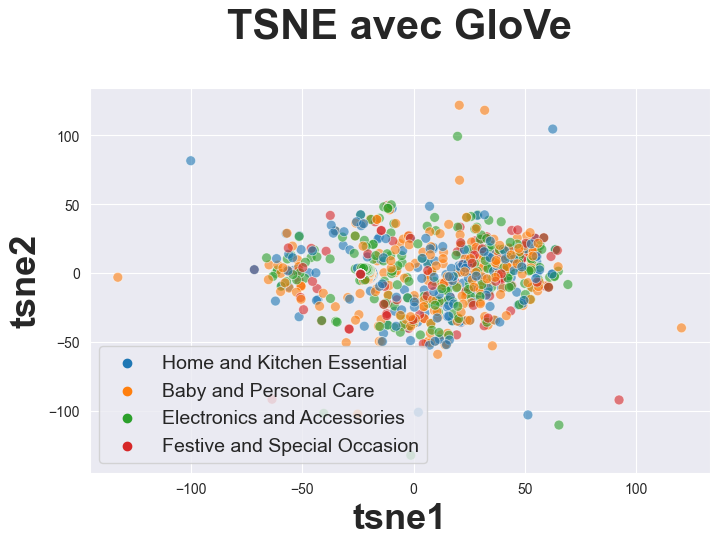

In [47]:
temps1 = time.time()

tsne = manifold.TSNE(n_components = 2, perplexity = 30, n_iter = 2000, init = 'random', random_state = 6)
X_tsne = tsne.fit_transform(feat_pca)

duration1 = time.time() - temps1
print("temps de T-SNE : ", "%15.2f" % duration1, "secondes")

df_tsne = pd.DataFrame(X_tsne, columns = ['tsne1', 'tsne2'])
df_tsne["class"] = df["category"]

plt.figure(figsize = (8,5))
sns.scatterplot(
    x = "tsne1", y = "tsne2",
    hue = "class",
    palette = sns.color_palette('tab10', n_colors = 4), s = 50, alpha = 0.6,
    data = df_tsne,
    legend = "brief")

plt.title('TSNE avec GloVe', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop = {'size': 14}) 

plt.show()

#### Word2Vec

In [48]:
########## Word2Vec ##########
# -> le word embedding le plus utilisé à l'heure actuelle - puissant et versatile

# pretrained model by Google
# https://code.google.com/archive/p/word2vec/
# This model is particularly complex, thus the pretrained model is saved in a very large file (about 4 GB)

# Load Google's pre-trained Word2Vec model, give the right path to the downloaded file
model = gensim.models.KeyedVectors.load_word2vec_format('../../data/models/GoogleNews-vectors-negative300.bin', binary = True)
model

In [49]:
df['clean_text'][0]

'key featur eleg polyest multicolor abstract eyelet door curtain floral curtain eleg polyest multicolor abstract eyelet door curtain cm height pack price r curtain enhanc look curtain made high qualiti polyest featur eyelet style stitch metal make room environ romant curtain wrinkl anti shrinkag eleg home bright modernist appeal design surreal attent sure steal heart contemporari eyelet valanc curtain slide smoothli draw apart first thing morn welcom bright sun ray want wish good morn whole world draw close even creat special moment joyou beauti given sooth print bring home eleg curtain softli filter light room get right amount specif eleg polyest multicolor abstract eyelet door curtain cm height pack gener brand eleg design door type eyelet model name abstract polyest door curtain set model id color multicolor dimens length cm box number content sale packag pack sale packag curtain bodi design materi polyest'

In [50]:
# tutoriel sur kaggle -> https://www.kaggle.com/code/pierremegret/gensim-word2vec-tutorial
# A REVOIR


sent = [row.split() for row in df['clean_text']]
phrases = Phrases(sent, min_count = 30, progress_per = 10000)

In [51]:
# Bigrammes = n-gram de rang 2
# bigram = sequence of two adjacent elements from a string of tokens

bigram = Phraser(phrases)
bigram

In [52]:
sentences = bigram[sent]
sentences

In [53]:
sentences[0]

['key_featur',
 'eleg',
 'polyest',
 'multicolor',
 'abstract',
 'eyelet',
 'door',
 'curtain',
 'floral',
 'curtain',
 'eleg',
 'polyest',
 'multicolor',
 'abstract',
 'eyelet',
 'door',
 'curtain',
 'cm',
 'height',
 'pack',
 'price_r',
 'curtain',
 'enhanc',
 'look',
 'curtain',
 'made',
 'high_qualiti',
 'polyest',
 'featur',
 'eyelet',
 'style',
 'stitch',
 'metal',
 'make',
 'room',
 'environ',
 'romant',
 'curtain',
 'wrinkl',
 'anti',
 'shrinkag',
 'eleg',
 'home',
 'bright',
 'modernist',
 'appeal',
 'design',
 'surreal',
 'attent',
 'sure',
 'steal',
 'heart',
 'contemporari',
 'eyelet',
 'valanc',
 'curtain',
 'slide',
 'smoothli',
 'draw',
 'apart',
 'first',
 'thing',
 'morn',
 'welcom',
 'bright',
 'sun',
 'ray',
 'want',
 'wish',
 'good',
 'morn',
 'whole',
 'world',
 'draw',
 'close',
 'even',
 'creat',
 'special',
 'moment',
 'joyou',
 'beauti',
 'given',
 'sooth',
 'print',
 'bring',
 'home',
 'eleg',
 'curtain',
 'softli',
 'filter',
 'light',
 'room',
 'get',
 'righ

In [54]:
# Most frequent words
# -> calculer fréquence de chaque mot

word_freq = defaultdict(int)
for sent in sentences:
    for i in sent:
        word_freq[i] += 1
len(word_freq)

3432

In [55]:
word_freq

defaultdict(int,
            {'key_featur': 183,
             'eleg': 56,
             'polyest': 63,
             'multicolor': 150,
             'abstract': 45,
             'eyelet': 43,
             'door': 36,
             'curtain': 50,
             'floral': 55,
             'cm': 330,
             'height': 96,
             'pack': 266,
             'price_r': 310,
             'enhanc': 17,
             'look': 98,
             'made': 168,
             'high_qualiti': 62,
             'featur': 116,
             'style': 49,
             'stitch': 7,
             'metal': 31,
             'make': 101,
             'room': 53,
             'environ': 3,
             'romant': 1,
             'wrinkl': 3,
             'anti': 6,
             'shrinkag': 1,
             'home': 151,
             'bright': 17,
             'modernist': 1,
             'appeal': 13,
             'design': 322,
             'surreal': 1,
             'attent': 4,
             'sure': 38,
          

In [56]:
# trier les mots par fréquence pour obtenir les 10 mots les plus fréquents
sorted(word_freq, key = word_freq.get, reverse = True)[:10]

['buy',
 'free_ship',
 'cash_deliveri',
 'specif',
 'product',
 'cm',
 'design',
 'color',
 'price_r',
 'day_replac']

In [57]:
cores = multiprocessing.cpu_count()

In [58]:
w2v_model = Word2Vec(
    min_count = 20,
    window = 2,
    sample = 6e-5,
    alpha = 0.03,
    min_alpha = 0.0007,
    negative = 20,
    workers = cores-1
    )

# to do -> explorer les paramètres

In [59]:
w2v_model.build_vocab(sentences, progress_per = 10000)

In [60]:
w2v_model.train(sentences, total_examples = w2v_model.corpus_count, epochs = 30, report_delay = 1)

(163285, 1220370)

In [61]:
w2v_model.init_sims(replace = True)

In [62]:
w2v_model.wv.most_similar(positive = ['color'])

[('content_sale', 0.9958341717720032),
 ('type', 0.9954322576522827),
 ('addit', 0.9950300455093384),
 ('featur', 0.9930413961410522),
 ('packag_pack', 0.992965579032898),
 ('box_number', 0.9925843477249146),
 ('machin', 0.9922755360603333),
 ('pack', 0.9919663071632385),
 ('model_name', 0.9911659359931946),
 ('style_code', 0.9911104440689087)]

In [63]:
w2v_model.wv.most_similar(positive = ['buy'])

[('day_replac', 0.9912797212600708),
 ('clasp', 0.9894543886184692),
 ('genuin_product', 0.9891952276229858),
 ('maximum', 0.9890258312225342),
 ('woman', 0.988636314868927),
 ('buckl', 0.9884998798370361),
 ('watch', 0.988398551940918),
 ('water_resist', 0.9876359105110168),
 ('sonata', 0.9876174330711365),
 ('deliveri', 0.9873653054237366)]

In [64]:
w2v_model.wv.most_similar(positive = ['watch'])

[('sonata', 0.9972852468490601),
 ('buckl', 0.9962140321731567),
 ('clasp', 0.9946561455726624),
 ('round', 0.9946197271347046),
 ('case', 0.994530200958252),
 ('maximum', 0.9943892359733582),
 ('water_resist', 0.991540789604187),
 ('dial', 0.9906145334243774),
 ('woman', 0.9897452592849731),
 ('buy', 0.9883984327316284)]

In [65]:
w2v_model.wv.similarity('buy', 'watch')

0.98839843

In [66]:
w2v_model.wv.doesnt_match(['buy', 'color', 'carpet'])

'buy'

In [67]:
w2v_model.wv.doesnt_match(['watch', 'bracelet', 'carpet'])

'watch'

In [ ]:
# Code issu de l'exemple du cours:

In [151]:
len(df['clean_text'][0])

921

In [162]:
w2v_size = 300
w2v_window = 5
w2v_min_count = 1
w2v_epochs = 100
maxlen = 500 # = maximum number of tokens in a sentence
sentences = df['clean_text'].to_list()
sentences

['key featur eleg polyest multicolor abstract eyelet door curtain floral curtain eleg polyest multicolor abstract eyelet door curtain cm height pack price r curtain enhanc look curtain made high qualiti polyest featur eyelet style stitch metal make room environ romant curtain wrinkl anti shrinkag eleg home bright modernist appeal design surreal attent sure steal heart contemporari eyelet valanc curtain slide smoothli draw apart first thing morn welcom bright sun ray want wish good morn whole world draw close even creat special moment joyou beauti given sooth print bring home eleg curtain softli filter light room get right amount specif eleg polyest multicolor abstract eyelet door curtain cm height pack gener brand eleg design door type eyelet model name abstract polyest door curtain set model id color multicolor dimens length cm box number content sale packag pack sale packag curtain bodi design materi polyest',
 'specif sathiya cotton bath towel bath towel red yellow blue bath towel f

In [163]:
sentences = [gensim.utils.simple_preprocess(text) for text in sentences]
sentences

[['key',
  'featur',
  'eleg',
  'polyest',
  'multicolor',
  'abstract',
  'eyelet',
  'door',
  'curtain',
  'floral',
  'curtain',
  'eleg',
  'polyest',
  'multicolor',
  'abstract',
  'eyelet',
  'door',
  'curtain',
  'cm',
  'height',
  'pack',
  'price',
  'curtain',
  'enhanc',
  'look',
  'curtain',
  'made',
  'high',
  'qualiti',
  'polyest',
  'featur',
  'eyelet',
  'style',
  'stitch',
  'metal',
  'make',
  'room',
  'environ',
  'romant',
  'curtain',
  'wrinkl',
  'anti',
  'shrinkag',
  'eleg',
  'home',
  'bright',
  'modernist',
  'appeal',
  'design',
  'surreal',
  'attent',
  'sure',
  'steal',
  'heart',
  'contemporari',
  'eyelet',
  'valanc',
  'curtain',
  'slide',
  'smoothli',
  'draw',
  'apart',
  'first',
  'thing',
  'morn',
  'welcom',
  'bright',
  'sun',
  'ray',
  'want',
  'wish',
  'good',
  'morn',
  'whole',
  'world',
  'draw',
  'close',
  'even',
  'creat',
  'special',
  'moment',
  'joyou',
  'beauti',
  'given',
  'sooth',
  'print',
  '

In [155]:
# Création et entraînement du modèle Word2Vec

print("Build & train Word2Vec model ...")
w2v_model = gensim.models.Word2Vec(min_count=w2v_min_count, window=w2v_window,
                                                vector_size=w2v_size,
                                                seed=42,
                                                workers=1)
#                                                workers=multiprocessing.cpu_count())
w2v_model.build_vocab(sentences)
w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=w2v_epochs)
model_vectors = w2v_model.wv
w2v_words = model_vectors.index_to_key
print("Vocabulary size: %i" % len(w2v_words))
print("Word2Vec trained")

Build & train Word2Vec model ...
Vocabulary size: 3353
Word2Vec trained


In [156]:
# Préparation des sentences (tokenization)

print("Fit Tokenizer ...")
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
x_sentences = pad_sequences(tokenizer.texts_to_sequences(sentences), maxlen = maxlen, padding='post')
num_words = len(tokenizer.word_index) + 1
print("Number of unique words: %i" % num_words)

Fit Tokenizer ...
Number of unique words: 3354


In [157]:
# Création de la matrice d'embedding

print("Create Embedding matrix ...")
w2v_size = 300
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1
embedding_matrix = np.zeros((vocab_size, w2v_size))
i=0
j=0
    
for word, idx in word_index.items():
    i +=1
    if word in w2v_words:
        j +=1
        embedding_vector = model_vectors[word]
        if embedding_vector is not None:
            embedding_matrix[idx] = model_vectors[word]
            
word_rate = np.round(j/i,4)
print("Word embedding rate : ", word_rate)
print("Embedding matrix: %s" % str(embedding_matrix.shape))

Create Embedding matrix ...
Word embedding rate :  1.0
Embedding matrix: (3354, 300)


In [161]:
# Création du modèle

word_input = Input(shape=(maxlen,), dtype='float64')

# Create the Embedding layer and set the weights directly
word_embedding = Embedding(
    input_dim=vocab_size,  # Specify the vocabulary size
    output_dim=w2v_size,   # Specify the dimension of word embeddings
    weights=[embedding_matrix],  # Set the weights
    trainable=False  # Optionally set trainable to False
)(word_input)

word_vec = GlobalAveragePooling1D()(word_embedding)  

embed_model = Model(inputs=[word_input], outputs=word_vec)

embed_model.summary()

ValueError: Unrecognized keyword arguments passed to Embedding: {'weights': [array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-1.31361985,  0.79326487, -0.62538487, ...,  0.50204891,
        -0.49769688, -1.23243415],
       [-0.397641  ,  0.62920743,  0.14274435, ...,  0.79367399,
        -0.69199091, -1.203089  ],
       ...,
       [-0.15304627, -0.13401295, -0.09248154, ..., -0.03147877,
        -0.26851559,  0.04921638],
       [-0.07079452, -0.06114796, -0.00633447, ..., -0.01415854,
        -0.03351859,  0.02856968],
       [-0.0854149 , -0.13074084,  0.00401868, ..., -0.01204507,
        -0.05348147,  0.03507001]])]}

In [ ]:
# Execution du modèle
embeddings = embed_model.predict(x_sentences)
embeddings.shape

In [ ]:
ARI, X_tsne, labels = ARI_fct(embeddings)

In [ ]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

#### FastText

In [ ]:
########## FastText ##########

# developed by Facebook AI Research lab
# probably the most efficient Word Embedding
# does not only use words, but all possible n-grams (at character level) of any word to compute its embedding
# far more complex and heavy to use than the other models
# https://fasttext.cc/#

In [ ]:
# non testé ici

#### Latent Dirichlet Allocation (LDA)

In [74]:
########## LDA ########### 

# Le modèle Latent Dirichlet Allocation suppose que chaque document est un mélange d’un petit nombre de topics, et que chaque occurrence d’un mot correspond à l’un des sujets du document. 
# En réalité, chaque mot se voit attribuer un topic selon la loi de Dirichlet. On obtient donc un premier topic model. Pour générer le suivant, on prend chaque mot et on met à jour le topic auquel il est associé. 
# Ce nouveau thème est celui qui aurait la plus forte probabilité de le générer dans ce document.
# Le Latent Dirichlet Allocation n’est pas un algorithme à itération unique. A la première itération, l’algorithme attribue au hasard des mots aux topics. 
# Il passe ensuite en revue chaque mot de chaque document et applique des formules de calcul de probabilité.
# Le processus est ensuite répété à travers diverses itérations jusqu’à ce que l’algorithme génère un ensemble de topics et qu’on obtiennent un modèle satisfaisant.

In [75]:
# https://larevueia.fr/latent-dirichlet-allocation-topic-modeling-en-python/
# cours vivadata:


In [76]:
# Create a corpus
corpus = df['tokens']

# Compute the dictionary: this is a dictionary mapping words and their corresponding numbers for later visualisation
id2word = Dictionary(corpus)

# Create a BOW
bow = [id2word.doc2bow(line) for line in corpus]  # convert corpus to BoW format

# Instanciate a TF-IDF
tfidf_model = TfidfModel(bow)

# Compute the TF-IDF
tf_idf_gensim = tfidf_model[bow]

In [77]:
# Compute the LDA
lda1 = LdaModel(corpus = tf_idf_gensim, num_topics = 5, id2word = id2word, passes = 10, random_state = 0)

# Print the main topics
pprint(lda1.print_topics())

[(0,
  '0.004*"tenda" + 0.004*"guarantee" + 0.004*"replacement" + 0.004*"kadhai" + '
  '0.004*"day" + 0.003*"genuine" + 0.003*"cash" + 0.003*"shipping" + '
  '0.003*"delivery" + 0.003*"products"'),
 (1,
  '0.006*"towel" + 0.005*"bath" + 0.005*"cm" + 0.004*"cotton" + '
  '0.004*"polyester" + 0.004*"blanket" + 0.004*"eyelet" + 0.004*"double" + '
  '0.004*"curtain" + 0.003*"door"'),
 (2,
  '0.004*"rockmantra" + 0.004*"warranty" + 0.004*"timewel" + 0.004*"men" + '
  '0.004*"laptop" + 0.003*"skin" + 0.003*"perucci" + 0.003*"mug" + '
  '0.003*"ceramic" + 0.003*"product"'),
 (3,
  '0.015*"watch" + 0.013*"analog" + 0.009*"women" + 0.008*"discounts" + '
  '0.008*"sonata" + 0.008*"men" + 0.007*"india" + 0.007*"online" + '
  '0.007*"guarantee" + 0.007*"great"'),
 (4,
  '0.007*"baby" + 0.007*"mug" + 0.005*"girl" + 0.004*"details" + '
  '0.004*"fabric" + 0.004*"ceramic" + 0.004*"cotton" + 0.004*"boy" + '
  '0.004*"dress" + 0.004*"usb"')]


In [78]:
# Instantiate the TF-IDF vectorizer
vectorizer = TfidfVectorizer(lowercase = False, analyzer = lambda x: x)

# Compute the TF-IDF
tf_idf = vectorizer.fit_transform(df['tokens'])
pd.DataFrame(data = tf_idf.toarray(), columns = vectorizer.get_feature_names_out(), index = corpus.index).head()


aa  aaa  aapno  aarika  abilities  ability  able  abode  abroad  absolute  \
0  0.0  0.0    0.0     0.0        0.0      0.0   0.0    0.0     0.0       0.0   
1  0.0  0.0    0.0     0.0        0.0      0.0   0.0    0.0     0.0       0.0   
2  0.0  0.0    0.0     0.0        0.0      0.0   0.0    0.0     0.0       0.0   
3  0.0  0.0    0.0     0.0        0.0      0.0   0.0    0.0     0.0       0.0   
4  0.0  0.0    0.0     0.0        0.0      0.0   0.0    0.0     0.0       0.0   

   absorbency  absorbent  absorber  absorbing  absorbs  abstract  abstracts  \
0         0.0        0.0       0.0        0.0      0.0  0.185806        0.0   
1         0.0        0.0       0.0        0.0      0.0  0.000000        0.0   
2         0.0        0.0       0.0        0.0      0.0  0.000000        0.0   
3         0.0        0.0       0.0        0.0      0.0  0.000000        0.0   
4         0.0        0.0       0.0        0.0      0.0  0.000000        0.0   

   abstrcts   ac  accent  access  accessories  accessory  accident  \
0       0.0  0.0     0.0     0.0          0.0        0.0       0.0   
1       0.0  0.0     0.0     0.0          0.0        0.0       0.0   
2       0.0  0.0     0.0     0.0          0.0        0.0       0.0   
3       0.0  0.0     0.0     0.0          0.0        0.0       0.0   
4       0.0  0.0     0.0     0.0          0.0        0.0       0.0   

   accidental  accomplishes  according  acer  aches  aching  acid  acne  \
0         0.0           0.0        0.0   0.0    0.0     0.0   0.0   0.0   
1         0.0           0.0        0.0   0.0    0.0     0.0   0.0   0.0   
2         0.0           0.0        0.0   0.0    0.0     0.0   0.0   0.0   
3         0.0           0.0        0.0   0.0    0.0     0.0   0.0   0.0   
4         0.0           0.0        0.0   0.0    0.0     0.0   0.0   0.0   

   across  acrylic  act  active  acts  actual  adaa  adapter  adapters  \
0     0.0      0.0  0.0     0.0   0.0     0.0   0.0      0.0       0.0   
1     0.0      0.0  0.0     0.0   0.0     0.0   0.0      0.0       0.0   
2     0.0      0.0  0.0     0.0   0.0     0.0   0.0      0.0       0.0   
3     0.0      0.0  0.0     0.0   0.0     0.0   0.0      0.0       0.0   
4     0.0      0.0  0.0     0.0   0.0     0.0   0.0      0.0       0.0   

   adaptor  add  added  addiction  adding  addition  additional  additionally  \
0      0.0  0.0    0.0        0.0     0.0       0.0         0.0           0.0   
1      0.0  0.0    0.0        0.0     0.0       0.0         0.0           0.0   
2      0.0  0.0    0.0        0.0     0.0       0.0         0.0           0.0   
3      0.0  0.0    0.0        0.0     0.0       0.0         0.0           0.0   
4      0.0  0.0    0.0        0.0     0.0       0.0         0.0           0.0   

   adds  ...  wool  word  work  working  workmanship  works  workstation  \
0   0.0  ...   0.0   0.0   0.0      0.0          0.0    0.0          0.0   
1   0.0  ...   0.0   0.0   0.0      0.0          0.0    0.0          0.0   
2   0.0  ...   0.0   0.0   0.0      0.0          0.0    0.0          0.0   
3   0.0  ...   0.0   0.0   0.0      0.0          0.0    0.0          0.0   
4   0.0  ...   0.0   0.0   0.0      0.0          0.0    0.0          0.0   

      world  worn  worries  worry  worshippers  would  woven  wow  wrap  \
0  0.062491   0.0      0.0    0.0          0.0    0.0    0.0  0.0   0.0   
1  0.000000   0.0      0.0    0.0          0.0    0.0    0.0  0.0   0.0   
2  0.000000   0.0      0.0    0.0          0.0    0.0    0.0  0.0   0.0   
3  0.000000   0.0      0.0    0.0          0.0    0.0    0.0  0.0   0.0   
4  0.000000   0.0      0.0    0.0          0.0    0.0    0.0  0.0   0.0   

   wrapped  wrapper  wring  wrinkle  wrist  write  wrought    x  xemex   xl  \
0      0.0      0.0    0.0  0.07315    0.0    0.0      0.0  0.0    0.0  0.0   
1      0.0      0.0    0.0  0.00000    0.0    0.0      0.0  0.0    0.0  0.0   
2      0.0      0.0    0.0  0.00000    0.0    0.0      0.0  0.0    0.0  0.0   
3      0.0    

In [79]:
# Dictionary mapping from word IDs to words, initialized in a lazy manner to save memory (not created until needed)
dictionary = Dictionary(df['tokens'])
print(dictionary)

Dictionary<4225 unique tokens: ['abstract', 'amount', 'anti', 'apart', 'appeal']...>


In [80]:
# Convert the TF-IDF to the needed input for Gensim
tf_idf_sklearn = Sparse2Corpus(tf_idf, documents_columns = False)

In [81]:
# Compute the LDA
lda2 = LdaModel(corpus = tf_idf_sklearn, id2word = id2word, num_topics = 5, passes = 10, random_state = 42)

# Print the main topics
pprint(lda2.print_topics())

[(0,
  '0.005*"extraction" + 0.004*"rainy" + 0.004*"introduces" + 0.004*"sauce" + '
  '0.003*"exporters" + 0.003*"signature" + 0.003*"ability" + 0.003*"christ" + '
  '0.003*"therapeutic" + 0.003*"balm"'),
 (1,
  '0.005*"baking" + 0.005*"marble" + 0.005*"grapefruit" + 0.005*"induction" + '
  '0.005*"little" + 0.005*"christ" + 0.005*"therapeutic" + 0.005*"balm" + '
  '0.005*"introduces" + 0.004*"adapter"'),
 (2,
  '0.006*"improper" + 0.005*"smelled" + 0.004*"luxurious" + 0.004*"pindia" + '
  '0.004*"jersey" + 0.004*"lithium" + 0.004*"precious" + 0.004*"little" + '
  '0.004*"matte" + 0.003*"marble"'),
 (3,
  '0.006*"marble" + 0.006*"baking" + 0.006*"grapefruit" + 0.006*"induction" + '
  '0.006*"christ" + 0.006*"therapeutic" + 0.006*"little" + 0.006*"exporters" + '
  '0.005*"balm" + 0.005*"pindia"'),
 (4,
  '0.019*"trusted" + 0.016*"pillow" + 0.010*"vivify" + 0.010*"precious" + '
  '0.010*"grapefruit" + 0.010*"marble" + 0.010*"baking" + 0.010*"induction" + '
  '0.009*"pindia" + 0.009*"litt

In [82]:
# LDA visualization

# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(topic_model = lda1, corpus = bow, dictionary = id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.070560  0.048856       1        1  38.198051
2     -0.010987 -0.055561       2        1  20.149618
3      0.072312  0.040128       3        1  19.894581
1     -0.015737 -0.018910       4        1  14.340195
0      0.024972 -0.014514       5        1   7.417555, topic_info=           Term        Freq       Total Category  logprob  loglift
184       watch  192.000000  192.000000  Default  30.0000  30.0000
168      analog  178.000000  178.000000  Default  29.0000  29.0000
2516     sonata   77.000000   77.000000  Default  28.0000  28.0000
114       women  110.000000  110.000000  Default  27.0000  27.0000
174   discounts   96.000000   96.000000  Default  26.0000  26.0000
...         ...         ...         ...      ...      ...      ...
180      online    8.922042  123.570003   Topic5  -5.9639  -0.0270
999     sticker    6.242647   34.585293   Topic5  -6.3210   0.8893
955   showpiece    7.315925   82.284422   Topic5  -6.1624   0.1812
357        best    7.182722   83.316223   Topic5  -6.1808   0.1504
13           cm    6.131111  125.998109   Topic5  -6.3391  -0.4216

[280 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
0         1  0.678416  abstract
0         2  0.028869  abstract
0         3  0.014434  abstract
0         4  0.259819  abstract
0         5  0.014434  abstract
...     ...       ...       ...
1328      1  0.128761       yet
1328      2  0.804755       yet
1328      3  0.032190       yet
1328      4  0.032190       yet
1328      5  0.032190       yet

[1070 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 3, 4, 2, 1])

#### BERT

In [83]:
########## BERT ###########

# Liens ressources Openclassrooms :
# https://huggingface.co/docs/transformers/index
# https://github.com/google-research/bert
# https://lesdieuxducode.com/blog/2019/4/bert--le-transformer-model-qui-sentraine-et-qui-represente
# https://huggingface.co/docs/transformers/model_doc/bert#transformers.TFBertModel
# https://www.kaggle.com/models/tensorflow/bert/frameworks/tensorFlow2/variations/en-uncased-l-12-h-768-a-12/versions/4?tfhub-redirect=true

# tutoriel
# https://www.kaggle.com/code/harshjain123/bert-for-everyone-tutorial-implementation

# github BERT
# https://github.com/google-research/bert/blob/master/README.md

#### specify GPU
# cuda = parallel computing platform by NVIDIA, for efficient GPU acceleration
# si mal installé -> erreurs ensuite
device = torch.device('cuda')
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

print(torch.cuda.is_available())
print(torch.cuda.device_count())

False
0


In [84]:
print(tf.__version__)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print(tf.test.is_built_with_cuda())

2.16.1
Num GPUs Available:  0
False


In [85]:
df

category  \
0     Home and Kitchen Essential   
1         Baby and Personal Care   
2     Home and Kitchen Essential   
3     Home and Kitchen Essential   
4    Electronics and Accessories   
..                           ...   
919       Baby and Personal Care   
920       Baby and Personal Care   
921       Baby and Personal Care   
922       Baby and Personal Care   
923       Baby and Personal Care   

                                           description  \
0    Key Features of Elegance Polyester Multicolor ...   
1    Specifications of Sathiyas Cotton Bath Towel (...   
2    Key Features of SANTOSH ROYAL FASHION Cotton P...   
3    Key Features of Jaipur Print Cotton Floral Kin...   
4    Camerii WM64 Elegance Analog Watch  - For Men,...   
..                                                 ...   
919  Buy 999store Medium Paper Sticker for Rs.599 o...   
920  Buy Wallmantra Medium Vinyl Stickers Sticker f...   
921  Oren Empower Extra Large Self Adhesive Sticker...   
922  Buy Wallmantra Medium Vinyl Sticker Sticker fo...   
923  Buy Uberlyfe Large Vinyl Sticker for Rs.595 on...   

                                                tokens  \
0    [key, features, elegance, polyester, multicolo...   
1    [specifications, sathiyas, cotton, bath, towel...   
2    [key, features, santosh, royal, fashion, cotto...   
3    [key, features, jaipur, print, cotton, floral,...   
4    [camerii, elegance, analog, watch, men, boys, ...   
..                                                 ...   
919  [buy, medium, paper, sticker, online, medium, ...   
920  [buy, wallmantra, medium, vinyl, stickers, sti...   
921  [oren, empower, extra, large, self, adhesive, ...   
922  [buy, wallmantra, medium, vinyl, sticker, stic...   
923  [buy, uberlyfe, large, vinyl, sticker, online,...   

                                               stemmed  \
0    [key, featur, eleg, polyest, multicolor, abstr...   
1    [specif, sathiya, cotton, bath, towel, bath, t...   
2    [key, featur, santosh, royal, fashion, cotton,...   
3    [key, featur, jaipur, print, cotton, floral, k...   
4    [camerii, eleg, analog, watch, men, boy, buy, ...   
..                                                 ...   
919  [buy, medium, paper, sticker, onlin, medium, p...   
920  [buy, wallmantra, medium, vinyl, sticker, stic...   
921  [oren, empow, extra, larg, self, adhes, sticke...   
922  [buy, wallmantra, medium, vinyl, sticker, stic...   
923  [buy, uberlyf, larg, vinyl, sticker, onlin, ub...   

                                            lemmatized  \
0    [key, featur, eleg, polyest, multicolor, abstr...   
1    [specif, sathiya, cotton, bath, towel, bath, t...   
2    [key, featur, santosh, royal, fashion, cotton,...   
3    [key, featur, jaipur, print, cotton, floral, k...   
4    [camerii, eleg, analog, watch, men, boy, buy, ...   
..                                                 ...   
919  [buy, medium, paper, sticker, onlin, medium, p...   
920  [buy, wallmantra, medium, vinyl, sticker, stic...   
921  [oren, empow, extra, larg, self, adhes, sticke...   
922  [buy, wallmantra, medium, vinyl, sticker, stic...   
923  [buy, uberlyf, larg, vinyl, sticker, onlin, ub...   

                                            clean_text  target_encoded  
0    key featur eleg polyest multicolor abstract ey...               3  
1    specif sathiya cotton bath towel bath towel re...               0  
2    key featur santosh royal fashion cotton print ...               3  
3    key featur jaipur print cotton floral king siz...               3  
4    camerii eleg analog watch men boy buy camerii ...               1  
..                                                 ...             ...  
919  buy medium paper sticker onlin medium paper st...               0  
920  buy wallmantra medium vinyl sticker sticker on...               0  
921  oren empow extra larg self adhes sticker pack ...               0  
922  buy wallmantra medium vinyl sticker sticker on...               0  


In [86]:
df.columns

Index(['category', 'description', 'tokens', 'stemmed', 'lemmatized',
       'clean_text', 'target_encoded'],
      dtype='object')

In [87]:
# Test avec exemple Huggingface - PyTorch
# https://huggingface.co/google-bert/bert-base-uncased
from transformers import BertTokenizer, BertModel
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained("bert-base-uncased")
text = "Replace me by any text you'd like."
encoded_input = tokenizer(text, return_tensors = 'pt')
output = model(**encoded_input)
output

BaseModelOutputWithPoolingAndCrossAttentions(last_hidden_state=tensor([[[ 0.1386,  0.1583, -0.2967,  ..., -0.2708, -0.2844,  0.4581],
         [ 0.5364, -0.2327,  0.1754,  ...,  0.5540,  0.4981, -0.0024],
         [ 0.3002, -0.3475,  0.1208,  ..., -0.4562,  0.3288,  0.8773],
         ...,
         [ 0.3799,  0.1203,  0.8283,  ..., -0.8624, -0.5957,  0.0471],
         [-0.0252, -0.7177, -0.6950,  ...,  0.0757, -0.6668, -0.3401],
         [ 0.7535,  0.2391,  0.0717,  ...,  0.2467, -0.6458, -0.3213]]],
       grad_fn=<NativeLayerNormBackward0>), pooler_output=tensor([[-0.9377, -0.5043, -0.9799,  0.9030,  0.9329, -0.2438,  0.8926,  0.2288,
         -0.9531, -1.0000, -0.8862,  0.9906,  0.9855,  0.7155,  0.9455, -0.8645,
         -0.6035, -0.6666,  0.3020, -0.1587,  0.7455,  1.0000, -0.4022,  0.4261,
          0.6151,  0.9996, -0.8773,  0.9594,  0.9585,  0.6950, -0.6718,  0.3325,
         -0.9954, -0.2268, -0.9658, -0.9951,  0.6127, -0.7670,  0.0873,  0.0824,
         -0.9518,  0.4713,  1.00

In [88]:
# Test avec exemple Huggingface - Tensorflow
# https://huggingface.co/google-bert/bert-base-uncased
from transformers import BertTokenizer, TFBertModel
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = TFBertModel.from_pretrained("bert-base-uncased")
text = "Replace me by any text you'd like."
encoded_input = tokenizer(text, return_tensors = 'tf')
output = model(encoded_input)
output

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

TFBaseModelOutputWithPoolingAndCrossAttentions(last_hidden_state=<tf.Tensor: shape=(1, 12, 768), dtype=float32, numpy=
array([[[ 0.13862717,  0.1582686 , -0.29666448, ..., -0.27084976,
         -0.28436303,  0.45808443],
        [ 0.5363637 , -0.23269634,  0.17541957, ...,  0.55402535,
          0.49807218, -0.00240732],
        [ 0.30023807, -0.3475118 ,  0.1208433 , ..., -0.45624867,
          0.3288023 ,  0.8772824 ],
        ...,
        [ 0.37985978,  0.12028755,  0.82829374, ..., -0.8623719 ,
         -0.59569633,  0.04711499],
        [-0.02524157, -0.71767503, -0.6950474 , ...,  0.07574242,
         -0.66678125, -0.340074  ],
        [ 0.75353795,  0.23910902,  0.07174437, ...,  0.24671552,
         -0.6458064 , -0.32129768]]], dtype=float32)>, pooler_output=<tf.Tensor: shape=(1, 768), dtype=float32, numpy=
array([[-0.9376787 , -0.504259  , -0.979893  ,  0.9030441 ,  0.9329327 ,
        -0.24377495,  0.89257544,  0.22880587, -0.9531208 , -0.9999953 ,
        -0.88623035,  0.990

In [89]:
# Utilisation du code donné dans l'exemple (exemple tweets feature extraction sentence + embedding)

In [103]:
# Define your model class here

@tf.function
def predict_step(model, data):
    return model(data, training=False)

# Fonction de préparation des sentences
def bert_inp_fct(sentences, bert_tokenizer, max_length):
    """
    Fonction de préparation des sentences pour le modèle BERT model
    -> encode les sentences en utilisant le tokenizer (bert_tokenizer)
    output: input_ids, token_type_ids, et attention_mask
    """
    input_ids = []
    token_type_ids = []
    attention_mask = []
    bert_inp_tot = []

    for sent in sentences:
        bert_inp = bert_tokenizer.encode_plus(
            sent,
            add_special_tokens = True,
            max_length = max_length,
            padding = 'max_length',
            return_attention_mask = True,
            return_token_type_ids = True,
            truncation = True,
            return_tensors = 'tf'
            )

        input_ids.append(bert_inp['input_ids'][0])
        token_type_ids.append(bert_inp['token_type_ids'][0])
        attention_mask.append(bert_inp['attention_mask'][0])
        bert_inp_tot.append((bert_inp['input_ids'][0], bert_inp['token_type_ids'][0], bert_inp['attention_mask'][0]))

    input_ids = np.asarray(input_ids)
    token_type_ids = np.asarray(token_type_ids)
    attention_mask = np.array(attention_mask)

    return input_ids, token_type_ids, attention_mask, bert_inp_tot


# Fonction de création des features
def feature_BERT_fct(model, model_type, sentences, max_length, b_size, mode = 'HF'):
    """
    Fonction de création des features en utilisant le model donné en input (model)
    Itère sur chaque batch de sentences, prépare les inputs en utilisant la fonction bert_inp_fct et les process en utilisant le modèle Bert
    Deux mode différents: HF (Huggingface) ou THhub (Tensorflow Hub) -> deux modèles différents pour obtenir les "last_hidden_state"
    Calcule la moyenne des last hidden states sur l'ensemble des tokens pour générer les features
    """
    batch_size = b_size
    batch_size_pred = b_size
    bert_tokenizer = AutoTokenizer.from_pretrained(model_type)
    time1 = time.time()

    last_hidden_states_tot = []  # Initialize list to hold all hidden states

    for step in range(len(sentences) // batch_size):
        idx = step * batch_size
        input_ids, token_type_ids, attention_mask, bert_inp_tot = bert_inp_fct(sentences[idx:idx + batch_size], bert_tokenizer, max_length)

        # Bert HuggingFace
        if mode == 'HF':
            outputs = model.call([input_ids, attention_mask, token_type_ids])
            if isinstance(outputs, tuple):  # Ensure compatibility with both TensorFlow 1.x and 2.x
                last_hidden_states = outputs[0]
            else:
                last_hidden_states = outputs.last_hidden_state

        # Bert Tensorflow Hub
        if mode == 'TFhub':
            text_preprocessed = {
                'input_word_ids': input_ids,
                'input_mask': attention_mask,
                'input_type_ids': token_type_ids
                }
            outputs = model(text_preprocessed)
            last_hidden_states = outputs['sequence_output']

        last_hidden_states_tot.append(last_hidden_states)

    # Handle remaining samples (sinon on perd 4 samples)
    if len(sentences) % batch_size != 0:
        remaining_samples = sentences[(len(sentences) // batch_size) * batch_size:]
        input_ids, token_type_ids, attention_mask, bert_inp_tot = bert_inp_fct(remaining_samples, bert_tokenizer, max_length)
    
        # Process remaining samples
        if mode == 'HF':
            outputs = model.call([input_ids, attention_mask, token_type_ids])
            if isinstance(outputs, tuple):  # Ensure compatibility with both TensorFlow 1.x and 2.x
                last_hidden_states = outputs[0]
            else:
                last_hidden_states = outputs.last_hidden_state

        if mode == 'TFhub':
            text_preprocessed = {
                'input_word_ids': input_ids,
                'input_mask': attention_mask,
                'input_type_ids': token_type_ids
                }
            outputs = model(text_preprocessed)
            last_hidden_states = outputs['sequence_output']

        last_hidden_states_tot.append(last_hidden_states)

    # Concatenate hidden states for all batches
    last_hidden_states_tot = np.concatenate(last_hidden_states_tot, axis = 0)

    features_bert = np.mean(last_hidden_states_tot, axis = 1)

    time2 = np.round(time.time() - time1, 0)
    print('temps traitement : ', time2)
     
    return features_bert, last_hidden_states_tot

In [104]:
## BERT HuggingFace

In [105]:
# model 'bert-base-uncased'

max_length = 64
batch_size = 10
model_type = 'bert-base-uncased'
model = TFAutoModel.from_pretrained(model_type)
sentences = df['clean_text'].to_list()

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [106]:
len(sentences)

924

In [107]:
len(labels)

924

In [108]:
# Création des features
features_bert, last_hidden_states_tot = feature_BERT_fct(model, model_type, sentences, max_length, batch_size, mode = 'HF')

temps traitement :  45.0


In [109]:
features_bert.shape

(924, 768)

In [110]:
last_hidden_states_tot.shape

(924, 64, 768)

In [111]:
ARI, X_tsne, labels = ARI_fct(features_bert)

ARI :  0.1884 time :  4.0


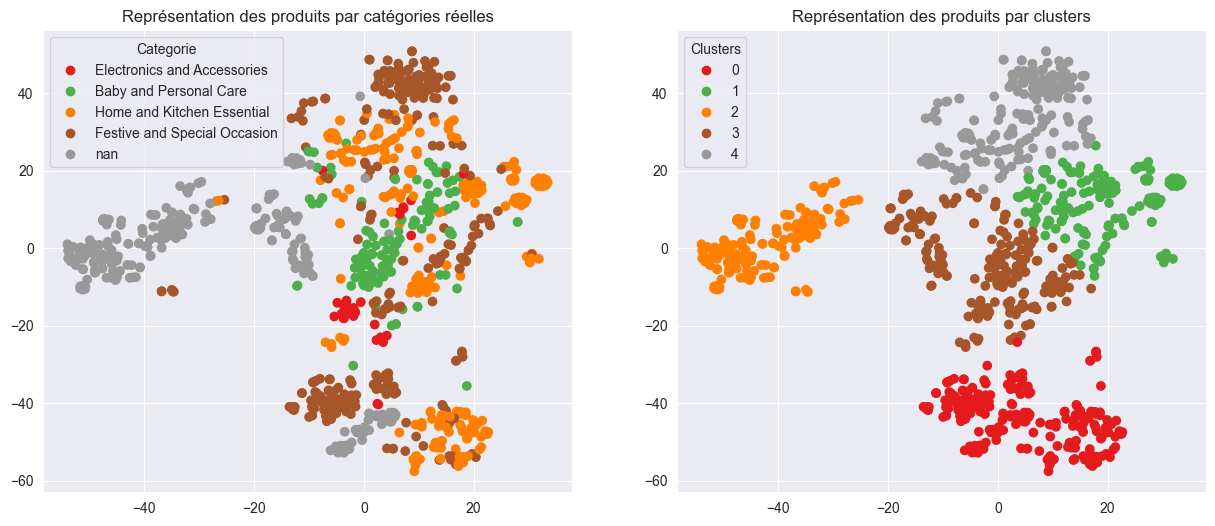

ARI :  0.1884


In [112]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

In [ ]:
### 'cardiffnlp/twitter-roberta-base-sentiment'
# Modèle pré-entraîné sur des tweets pour l'analyse de sentiment = particulièrement adapté au contexte

In [113]:
max_length = 64
batch_size = 10
model_type = 'cardiffnlp/twitter-roberta-base-sentiment'
model = TFAutoModel.from_pretrained(model_type)
sentences = df['clean_text'].to_list()

Some layers from the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment were not used when initializing TFRobertaModel: ['classifier']
- This IS expected if you are initializing TFRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFRobertaModel were initialized from the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaModel for predictions without further training.


In [114]:
features_bert, last_hidden_states_tot = feature_BERT_fct(model, model_type, sentences, max_length, batch_size, mode = 'HF')

temps traitement :  46.0


In [115]:
ARI, X_tsne, labels = ARI_fct(features_bert)

ARI :  0.1082 time :  4.0


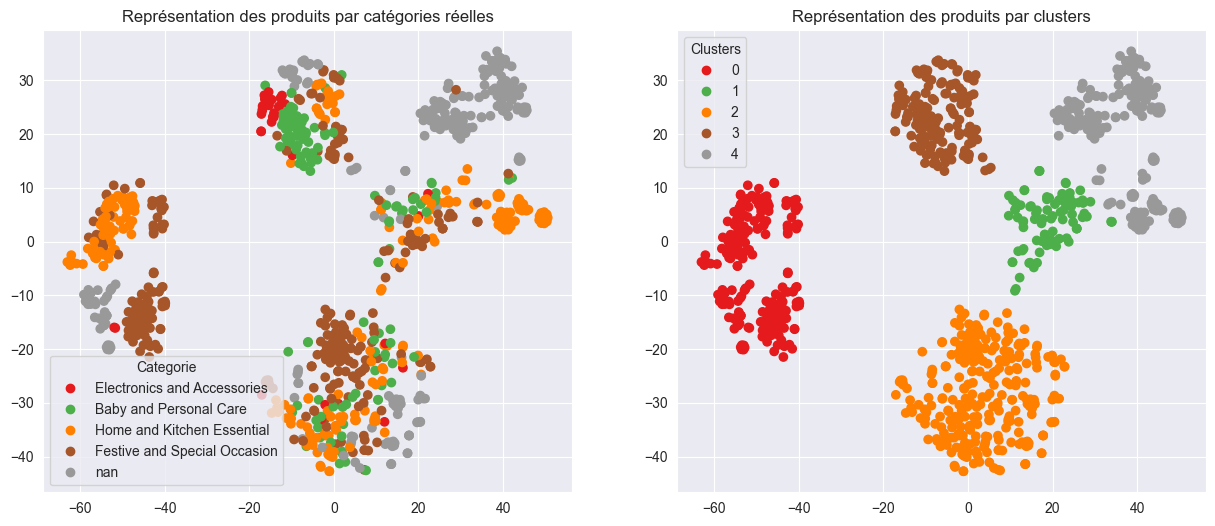

ARI :  0.1082


In [116]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

In [117]:
## BERT hub Tensorflow

In [118]:
# Guide sur le Tensorflow hub : https://www.tensorflow.org/text/tutorials/classify_text_with_bert
model_url = 'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4'
bert_layer = hub.KerasLayer(model_url, trainable = True)

In [119]:
sentences = df['clean_text'].to_list()

In [120]:
max_length = 64
batch_size = 10
model_type = 'bert-base-uncased'
model = bert_layer

features_bert, last_hidden_states_tot = feature_BERT_fct(model, model_type, sentences, max_length, batch_size, mode = 'TFhub')

temps traitement :  37.0


In [121]:
ARI, X_tsne, labels = ARI_fct(features_bert)

ARI :  0.1932 time :  4.0


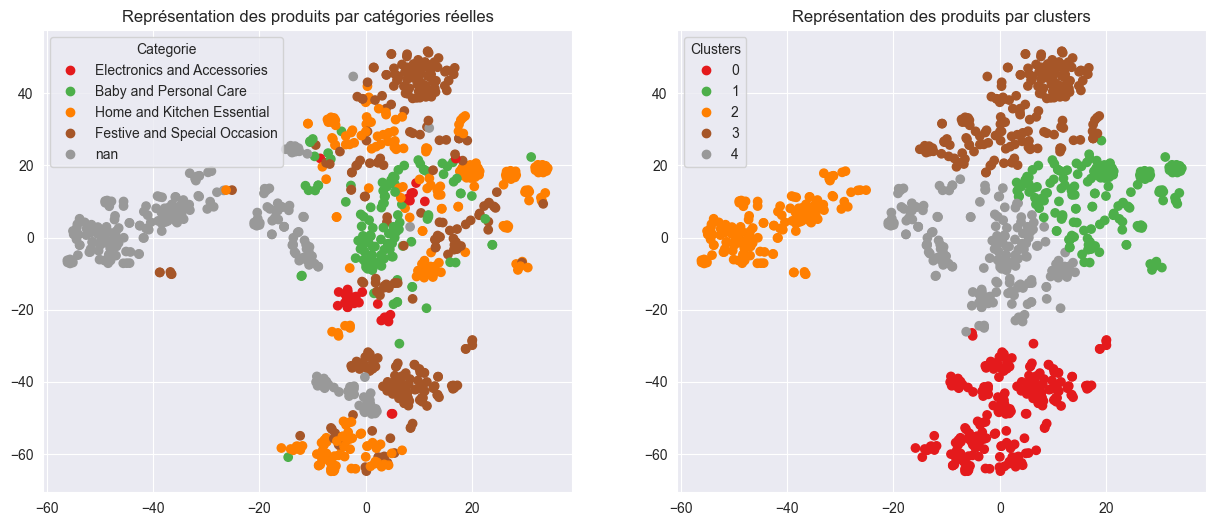

ARI :  0.1932


In [122]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

In [ ]:
# pour aller plus loin
# -> https://www.kaggle.com/code/andreshg/nlp-glove-bert-tf-idf-lstm-explained

#### Universal Sentence Encoder (USE)

In [135]:
########## USE (Universal Sentence Encoder) ##########

# https://www.tensorflow.org/hub/tutorials/semantic_similarity_with_tf_hub_universal_encoder?hl=fr

In [ ]:
# Universal Sentence Encoder encodes entire sentence or text into vectors of real numbers that can be used for clustering, sentence similarity, text classification, 
# and other Natural language processing (NLP) tasks.
# The pre-trained model is trained on greater than word length text, sentences, phrases, paragraphs, etc using a deep averaging network (DAN) encoder.

# word embedding -> represent word into vectors
# sentence embedding -> entire sentence or text along with semantics information is mapped into vectors of real numbers

In [ ]:
# Code issu du notebook exemple :

In [124]:
print(tf.__version__)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print(tf.test.is_built_with_cuda())

2.16.1
Num GPUs Available:  0
False


In [125]:
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

In [130]:
def feature_USE_fct(sentences, b_size):
    """
    Generates sentence embeddings using Universal Sentence Encoder (USE).

    Args:
    - sentences (list): A list of sentences to generate embeddings for.
    - b_size (int): Batch size for processing sentences.

    Returns:
    - features (numpy.ndarray or None): Array containing the sentence embeddings.
      If no sentences are provided or an error occurs during processing, returns None.
    """

    batch_size = b_size
    time1 = time.time()
    num_samples = len(sentences)

    features_list = []

    for step in range(num_samples // batch_size):
        idx = step * batch_size
        feat = embed(sentences[idx:idx + batch_size])
        features_list.append(feat)

    # Handle remaining samples (sinon on perd 4 samples)
    remaining_samples = sentences[(num_samples // batch_size) * batch_size:]
    if remaining_samples:
        remaining_feat = embed(remaining_samples)
        features_list.append(remaining_feat)

    features = np.concatenate(features_list) if features_list else None

    time2 = np.round(time.time() - time1, 0)
    print('temps traitement : ', time2)
    return features


In [131]:
batch_size = 10
sentences = df['clean_text'].to_list()

In [132]:
features_USE = feature_USE_fct(sentences, batch_size)

temps traitement :  0.0


In [133]:
ARI, X_tsne, labels = ARI_fct(features_USE)

ARI :  0.2294 time :  4.0


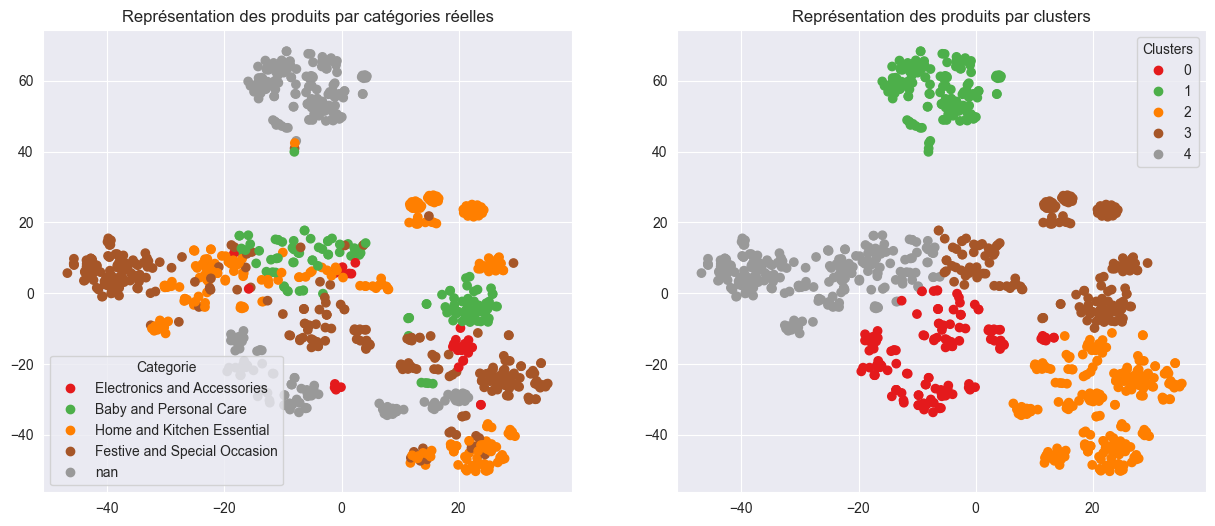

ARI :  0.2294


In [134]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

### Comparaison

In [ ]:
# A faire -> comparer la performance des différentes approches (avec/sans bow/tfidf, avec/sans word embedding et comparer les 3 word embedding differents)

# stocker ari score dans une variable

In [ ]:
########## CONCLUSION ##########

# -> à dire en ouverture
# analyse de texte basée sur description des produits semble pertinente car blablabla
# cependant, repose sur description -> il faut donc avec une description relativement pertinente du produit déjà disponible pour pouvoir le classifier automatiquement - pas super pratique